In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent))
str(Path.cwd().parent)

'c:\\Users\\jaesc2\\GitHub\\skforecast'

In [2]:
import re
import pytest
from pytest import approx
import numpy as np
import pandas as pd
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [3]:
import re
import pytest
import numpy as np
import pandas as pd
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Fixtures
from skforecast.ForecasterAutoregMultiVariate.tests.fixtures_ForecasterAutoregMultiVariate import series
from skforecast.ForecasterAutoregMultiVariate.tests.fixtures_ForecasterAutoregMultiVariate import exog
from skforecast.ForecasterAutoregMultiVariate.tests.fixtures_ForecasterAutoregMultiVariate import exog_predict

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm

transformer_exog = ColumnTransformer(
                       [('scale', StandardScaler(), ['exog_1']),
                        ('onehot', OneHotEncoder(), ['exog_2'])],
                       remainder = 'passthrough',
                       verbose_feature_names_out = False
                   )

In [19]:
forecaster = ForecasterAutoreg(XGBRegressor(random_state=123), lags=3)
forecaster.fit(y=pd.Series(np.arange(5)))
forecaster.in_sample_residuals

array([-0.0008831 ,  0.00088406])

In [20]:
forecaster_name = 'ForecasterAutoregCustom'

if forecaster_name in ['ForecasterAutoregMultiSeries', 'ForecasterAutoregMultiSeriesCustom']:
    print(1)

In [21]:
results.to_numpy()

array([[0.61820497, 0.39855187, 0.67329092],
       [0.41314101, 0.20291844, 0.56528096]])

In [6]:
import re
import pytest
import numpy as np
import pandas as pd
from pytest import approx
import sys
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.exceptions import NotFittedError
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate

In [8]:
forecaster = ForecasterAutoregMultiVariate(
                     regressor = Ridge(random_state=123),
                     level     = 'l1',
                     lags      = 2,
                     steps     = 3
                 )

steps = 3
n_validation = 12

metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
                                            forecaster          = forecaster,
                                            series              = series,
                                            steps               = steps,
                                            levels              = 'l1',
                                            metric              = 'mean_absolute_error',
                                            initial_train_size  = len(series) - n_validation,
                                            refit               = True,
                                            fixed_train_size    = True,
                                            exog                = series['l1'].rename('exog_1'),
                                            interval            = [5, 95],
                                            n_boot              = 500,
                                            random_state        = 123,
                                            in_sample_residuals = True,
                                            verbose             = False
                                        )

In [9]:
metrics_levels

,levels,mean_absolute_error
0,l1,0.077058


In [10]:
backtest_predictions

,l1,lower_bound,upper_bound
38,0.790172,0.651650,0.923091
39,0.493183,0.370860,0.640326
40,0.585632,0.465601,0.728775
41,0.256364,0.107432,0.377109
42,0.376045,0.242418,0.527925
43,0.454392,0.328888,0.595598
44,0.704881,0.559700,0.845592
45,0.326936,0.200854,0.479103
46,0.490999,0.356176,0.635244
47,0.820668,0.679178,0.951930


In [12]:
forecaster = ForecasterAutoregMultiVariate(
                     regressor = Ridge(random_state=123),
                     level     = 'l1',
                     lags      = 2,
                     steps     = 3
                 )

steps = 3
n_validation = 12

metrics_levels, backtest_predictions = backtesting_forecaster_multivariate(
                                            forecaster          = forecaster,
                                            series              = series,
                                            steps               = steps,
                                            levels              = 'l1',
                                            metric              = 'mean_absolute_error',
                                            initial_train_size  = len(series) - n_validation,
                                            refit               = True,
                                            fixed_train_size    = True,
                                            exog                = series['l1'].rename('exog_1'),
                                            interval            = [5, 95],
                                            n_boot              = 500,
                                            random_state        = 123,
                                            in_sample_residuals = True,
                                            verbose             = False
                                        )

In [13]:
metrics_levels

,levels,mean_absolute_error
0,l1,0.077058


In [17]:
metrics_levels.to_numpy()

array([['l1', 0.07705832858897509]], dtype=object)

In [18]:
backtest_predictions.to_numpy()

array([[0.79017158, 0.65165001, 0.92309077],
       [0.49318335, 0.37085985, 0.6403262 ],
       [0.58563228, 0.46560056, 0.72877519],
       [0.25636363, 0.10743222, 0.37710866],
       [0.37604542, 0.24241796, 0.52792491],
       [0.45439247, 0.32888843, 0.59559781],
       [0.70488052, 0.5596997 , 0.84559181],
       [0.32693583, 0.20085419, 0.47910327],
       [0.49099895, 0.35617576, 0.63524443],
       [0.82066806, 0.67917812, 0.95193044],
       [0.51109877, 0.39178411, 0.66186064],
       [0.54738032, 0.42195622, 0.69395717]])

In [26]:
def test_output_backtesting_forecaster_multiseries_ForecasterAutoregMultiSeries_not_refit_exog_interval_with_mocked():
    """
    Test output of backtesting_forecaster_multiseries in ForecasterAutoregMultiSeries 
    without refit with mocked using exog and intervals 
    (mocked done in Skforecast v0.5.0).
    """

    forecaster = ForecasterAutoregMultiSeries(
                    regressor = Ridge(random_state=123),
                    lags      = 2
                 )

    steps = 3
    n_validation = 12

    metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
                                               forecaster          = forecaster,
                                               series              = series,
                                               steps               = steps,
                                               levels              = ['l1'],
                                               metric              = 'mean_absolute_error',
                                               initial_train_size  = len(series) - n_validation,
                                               refit               = False,
                                               fixed_train_size    = False,
                                               exog                = series['l1'].rename('exog_1'),
                                               interval            = [5, 95],
                                               n_boot              = 500,
                                               random_state        = 123,
                                               in_sample_residuals = True,
                                               verbose             = False
                                           )
    
    expected_metric = pd.DataFrame({'levels': ['l1'], 
                                    'mean_absolute_error': [0.14238176570382063]})
    expected_predictions = pd.DataFrame(
                               data = np.array([[0.64371728, 0.36845896, 0.91248693],
                                                [0.47208179, 0.19871058, 0.74002421],
                                                [0.52132498, 0.24592578, 0.78440458],
                                                [0.3685079 , 0.09324957, 0.63727755],
                                                [0.42192697, 0.14855575, 0.68986939],
                                                [0.46785602, 0.19245683, 0.73093562],
                                                [0.61543694, 0.34017861, 0.88420659],
                                                [0.41627752, 0.14290631, 0.68421995],
                                                [0.4765156 , 0.20111641, 0.7395952 ],
                                                [0.65858347, 0.38332514, 0.92735312],
                                                [0.49986428, 0.22649307, 0.7678067 ],
                                                [0.51750994, 0.24211075, 0.78058954]]),
                               columns = ['l1', 'l1_lower_bound', 'l1_upper_bound'],
                               index = np.arange(38, 50)
                           )
                                   
    pd.testing.assert_frame_equal(expected_metric, metrics_levels)
    pd.testing.assert_frame_equal(expected_predictions, backtest_predictions)


def test_output_backtesting_forecaster_multiseries_ForecasterAutoregMultiSeries_refit_fixed_train_size_exog_interval_with_mocked():
    """
    Test output of backtesting_forecaster_multiseries in ForecasterAutoregMultiSeries with refit and fixed_train_size
    with mocked using exog and intervals (mocked done in Skforecast v0.5.0).
    """

    forecaster = ForecasterAutoregMultiSeries(
                    regressor = Ridge(random_state=123),
                    lags      = 2
                 )

    steps = 3
    n_validation = 12

    metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
                                               forecaster          = forecaster,
                                               series              = series,
                                               steps               = steps,
                                               levels              = 'l1',
                                               metric              = 'mean_absolute_error',
                                               initial_train_size  = len(series) - n_validation,
                                               refit               = True,
                                               fixed_train_size    = True,
                                               exog                = series['l1'].rename('exog_1'),
                                               interval            = [5, 95],
                                               n_boot              = 500,
                                               random_state        = 123,
                                               in_sample_residuals = True,
                                               verbose             = False
                                           )
    
    expected_metric = pd.DataFrame({'levels': ['l1'], 
                                    'mean_absolute_error': [0.1509587543248219]})
    expected_predictions = pd.DataFrame(
                               data = np.array([[0.64371728, 0.36845896, 0.91248693],
                                                [0.47208179, 0.19871058, 0.74002421],
                                                [0.52132498, 0.24592578, 0.78440458],
                                                [0.38179014, 0.15353798, 0.65675721],
                                                [0.43343713, 0.19888319, 0.70802106],
                                                [0.4695322 , 0.18716947, 0.74043601],
                                                [0.57891069, 0.31913315, 0.84636925],
                                                [0.41212578, 0.15090397, 0.69394422],
                                                [0.46851038, 0.20736343, 0.76349422],
                                                [0.63190066, 0.35803673, 0.90303047],
                                                [0.49132695, 0.21857874, 0.78112082],
                                                [0.51665452, 0.26139311, 0.80879351]]),
                               columns = ['l1', 'l1_lower_bound', 'l1_upper_bound'],
                               index = np.arange(38, 50)
                           )
                                   
    pd.testing.assert_frame_equal(expected_metric, metrics_levels)
    pd.testing.assert_frame_equal(expected_predictions, backtest_predictions)

TypeError: predict_interval() got an unexpected keyword argument 'levels'

In [2]:
import re
import pytest
import numpy as np
import pandas as pd
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [6]:
forecaster = ForecasterAutoregDirect(LinearRegression(fit_intercept=True), lags=3, steps=2)
residuals = {1: np.arange(10), 2: np.arange(10)}
residuals_2 = {1: np.arange(1200), 2: np.arange(1200)}
forecaster.set_out_sample_residuals(residuals = residuals)
forecaster.set_out_sample_residuals(residuals = residuals_2,
                                    append    = True)

[ 972  838  999 1150  129  663 1073 1129  958 1096  980  402   47 1042
  369  127 1093 1173  222  696 1087  448  690 1061  205  623  828  268
   92  225  955  338 1068  489  939  113 1092  238  322 1194    8  702
  465  578  748   91  610  669    7  966 1095  306  342  491  537  329
  758  815  245 1067  492  648  382  312  414  484    3  219  615  692
  788  100  742  807  494 1112  861 1018  486  867   56  128  813  796
  791 1006    6 1090  862  889  515   82  858  592 1088  827  108  768
  701  586 1078  123  528  729  653   48  868  720   76  680   58  792
  292  806  562  594 1075  415   22  399  995  293 1184  310  141  326
 1034  309  303  377  114  555  668 1052  611 1099  603  722 1139  531
 1167  474  220 1025  434  724 1137  126  532  214  897  697  336  659
 1152  463  831   19  341  994  971  761  624  946  348  819 1081  413
  608 1059   25 1181  783  355  488  930  544  534  424  340  706  297
  784 1191  710 1028  856 1019  160  358   38  254  950  808  860  482
  385 

In [2]:
################################################################################
#                            ForecasterAutoreg                                 #
#                                                                              #
# This work by Joaquin Amat Rodrigo and Javier Escobar Ortiz is licensed       #
# under a Creative Commons Attribution 4.0 International License.              #
################################################################################
# coding=utf-8

from typing import Union, Dict, List, Tuple, Any, Optional
import warnings
import logging
import sys
import numpy as np
import pandas as pd
from sklearn.base import clone
import pmdarima
from pmdarima.arima import ARIMA

import skforecast
from skforecast.utils import initialize_lags
from skforecast.utils import check_y
from skforecast.utils import check_exog
from skforecast.utils import preprocess_y
from skforecast.utils import preprocess_last_window
from skforecast.utils import preprocess_exog
from skforecast.utils import expand_index
from skforecast.utils import check_predict_input
from skforecast.utils import transform_series
from skforecast.utils import transform_dataframe

logging.basicConfig(
    format = '%(name)-10s %(levelname)-5s %(message)s', 
    level  = logging.INFO,
)

In [3]:
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge
import re
import pytest
from pmdarima.arima import ARIMA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [105]:
forecaster = ForecasterSarimax(
                regressor = ARIMA(order=(2,2,2), seasonal_order=(1,1,1,2))
            )

forecaster.regressor.get_params(deep=True)

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 2, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (1, 1, 1, 2),
 'start_params': None,
 'suppress_warnings': False,
 'trend': None,
 'with_intercept': True}

In [4]:
# Data download
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv'
data = pd.read_csv(url, sep=',')

# Data preparation
# ==============================================================================
data = data.rename(columns={'fecha': 'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data = data.set_index('date')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()
display(data.head())

# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

,y,exog_1,exog_2
date,,,
1992-04-01,0.379808,0.958792,1.166029
1992-05-01,0.361801,0.951993,1.117859
1992-06-01,0.410534,0.952955,1.067942
1992-07-01,0.483389,0.958078,1.097376
1992-08-01,0.475463,0.956370,1.122199


Train dates : 1992-04-01 00:00:00 --- 2005-06-01 00:00:00  (n=159)
Test dates  : 2005-07-01 00:00:00 --- 2008-06-01 00:00:00  (n=36)


In [6]:
# Fixtures
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )


In [6]:
y_datetime = pd.Series(data=list(y))
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
lw_datetime = pd.Series(data=list(y))
lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')
exog_datetime = pd.Series(data=list(exog))
exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
lw_exog_datetime = pd.Series(data=list(exog))
lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

In [38]:
df_exog = pd.DataFrame({'exog_1': list(exog), 'exog_2': ['a']*25+['b']*25})
df_exog.index = pd.date_range(start='2000', periods=50, freq='A')
df_lw_exog = df_exog.copy()
df_lw_exog.index = pd.date_range(start='2050', periods=50, freq='A')

transformer_exog = ColumnTransformer(
                        [('scale', StandardScaler(), ['exog_1']),
                        ('onehot', OneHotEncoder(), ['exog_2'])],
                        remainder = 'passthrough',
                        verbose_feature_names_out = False
                    )

In [120]:
list(np.arange(20)+ 1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [60]:
y_datetime = pd.Series(data=list(y))
y_datetime.name = 'y'
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')

lw_datetime = pd.Series(data=list(y))
lw_datetime.name = 'y'
lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

In [61]:
y_datetime.head(5)

2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64

In [44]:
lw_datetime.head(5)

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64

In [70]:
np.random.seed(123)
y_datetime = pd.Series(data=np.random.rand(50))
y_datetime.name = 'y'
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
print(y_datetime.head(5))

2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64


In [74]:
import session_info

session_info.show(html=False)

-----
numpy               1.23.5
pandas              1.4.0
pmdarima            2.0.2
pytest              7.1.2
session_info        1.0.0
skforecast          0.7.dev
sklearn             1.1.0
statsmodels         0.13.5
-----
IPython             8.5.0
jupyter_client      7.3.5
jupyter_core        4.11.1
notebook            6.4.12
-----
Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19042-SP0
-----
Session information updated at 2023-01-09 12:08


In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(endog=y_datetime, order=(1,1,1))
print(y_datetime.head(5))
res = mod.fit()
print(y_datetime.head(5))
print(res.model.data.orig_endog.head(5))

# print(res.model.data.orig_endog)
# print(res.forecast(5))
# print(res.resid)

new_res = res.append(lw_datetime, refit=False)
# print(new_res.forecast(5))
# print(new_res.resid)

2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64


In [72]:
from pmdarima.arima import ARIMA

modl = ARIMA(order=(1,1,1))
res = modl.fit(y_datetime)
print(modl.arima_res_.model.data.orig_endog.head(5))
print(res.arima_res_.model.data.orig_endog.head(5))

modl.arima_res_ = modl.arima_res_.append(lw_datetime, refit=False)


2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, dtype: float64
2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
Freq: A-DEC, dtype: float64


ValueError: Columns must match to concatenate along rows.

In [40]:
# pmdarima SARIMAX
# =====================================================================================
kwargs = {'order': (1,1,1), 'seasonal_order': (0,0,0,0)}
forecaster = ForecasterSarimax(
                regressor = ARIMA(**kwargs),
                transformer_y    = StandardScaler(),
                transformer_exog = transformer_exog
            )
forecaster.fit(y=y_datetime, exog=df_exog)
# print(forecaster.regressor.arima_res_.model.exog_names)
print([round(value, 16) for value in forecaster.predict(steps=5, exog=df_exog, last_window=lw_datetime, last_window_exog=df_lw_exog).values])

kwargs = {'order': (1,1,1), 'seasonal_order': (1,1,1,2)}
forecaster = ForecasterSarimax(
                regressor = ARIMA(**kwargs),
                transformer_y    = StandardScaler(),
                transformer_exog = transformer_exog
            )
forecaster.fit(y=y_datetime, exog=df_exog)
print([round(value, 16) for value in forecaster.predict(steps=5, exog=df_exog, last_window=lw_datetime, last_window_exog=df_lw_exog).values])

y
2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
y
2050-12-31    0.837129
2051-12-31   -0.927922
2052-12-31   -1.182952
2053-12-31    0.212741
2054-12-31    0.936063
Freq: A-DEC, dtype: float64
0
[1.0883760008461447, 0.9596655915602446, 1.0164563275894087, 1.0368122358153902, 1.0879339700749853]
y
2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
y
2050-12-31    0.837129
2051-12-31   -0.927922
2052-12-31   -1.182952
2053-12-31    0.212741
2054-12-31    0.936063
Freq: A-DEC, dtype: float64
0
[1.1359948592023694, 1.0197787345609874, 1.0563186630823083, 1.0890821402058224, 1.1539621608480948]


c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMAResults
np.random.seed(123)

y_datetime = pd.Series(data=list(y))
y_datetime.name = 'y'
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')

lw_datetime = pd.Series(data=list(y))
lw_datetime.name = 'y'
lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

mod = SARIMAX(endog=y_datetime, order=(1,1,1))
res = mod.fit()
print(type(res))

print(res.model.data.orig_endog)
# print(res.forecast(5))
# print(res.resid)

# new_res = res.append(lw_datetime, refit=False)
# print(new_res.forecast(5))
# print(new_res.resid)

<class 'statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper'>
2000-12-31    0.696469
2001-12-31    0.286139
2002-12-31    0.226851
2003-12-31    0.551315
2004-12-31    0.719469
2005-12-31    0.423106
2006-12-31    0.980764
2007-12-31    0.684830
2008-12-31    0.480932
2009-12-31    0.392118
2010-12-31    0.343178
2011-12-31    0.729050
2012-12-31    0.438572
2013-12-31    0.059678
2014-12-31    0.398044
2015-12-31    0.737995
2016-12-31    0.182492
2017-12-31    0.175452
2018-12-31    0.531551
2019-12-31    0.531828
2020-12-31    0.634401
2021-12-31    0.849432
2022-12-31    0.724455
2023-12-31    0.611024
2024-12-31    0.722443
2025-12-31    0.322959
2026-12-31    0.361789
2027-12-31    0.228263
2028-12-31    0.293714
2029-12-31    0.630976
2030-12-31    0.092105
2031-12-31    0.433701
2032-12-31    0.430863
2033-12-31    0.493685
2034-12-31    0.425830
2035-12-31    0.312261
2036-12-31    0.426351
2037-12-31    0.893389
2038-12-31    0.944160
2039-12-31    0.501837
2040-12-31   

In [13]:
forecaster.predict(steps=5, last_window=lw_datetime)

ValueError: Forecaster trained with exogenous variable/s. Same variable/s must be provided in `predict()`.

In [7]:
df_exog = pd.DataFrame({
                'exog_1': exog,
                'exog_2': ['a']*25+['b']*25}
            )
transformer_exog = ColumnTransformer(
                        [('scale', StandardScaler(), ['exog_1']),
                        ('onehot', OneHotEncoder(), ['exog_2'])],
                        remainder = 'passthrough',
                        verbose_feature_names_out = False
                    )

kwargs = {'order': (1,1,1), 'seasonal_order': (0,0,0,0)}
forecaster = ForecasterSarimax(
                regressor = ARIMA(**kwargs),
                transformer_y    = StandardScaler(),
                transformer_exog = transformer_exog
            )
forecaster.fit(y=y, exog=df_exog)
print([round(value, 16) for value in forecaster.predict(steps=5, exog=df_exog).values])

kwargs = {'order': (1,1,1), 'seasonal_order': (1,1,1,2)}
forecaster = ForecasterSarimax(
                regressor = ARIMA(**kwargs),
                transformer_y    = StandardScaler(),
                transformer_exog = transformer_exog
            )
forecaster.fit(y=y, exog=df_exog)
print([round(value, 16) for value in forecaster.predict(steps=5, exog=df_exog).values])

[0.9084670377251036, 0.7647883047064794, 0.8203336846873355, 0.8405859799961493, 0.8916990937197793]
[1.0095544323406163, 0.8707230817689734, 0.925811215455429, 0.9522848237323704, 1.0168960034047383]


c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
# pmdarima SARIMAX
# =====================================================================================
forecaster = ForecasterSarimax(
                regressor = ARIMA(order=(1,1,1))
            )
forecaster.fit(y=y)
forecaster.predict(steps=5).values

array([0.53566226, 0.5235128 , 0.5220779 , 0.52240695, 0.52302639])

In [9]:
# pmdarima SARIMAX
# =====================================================================================
forecaster = ForecasterSarimax(
                regressor = ARIMA(order=(1,1,1), seasonal_order=(1,1,1,2))
            )
forecaster.fit(y=y)
forecaster.predict(steps=5).values

array([0.64306902, 0.60507108, 0.63972942, 0.62851983, 0.66561887])

In [15]:
y_datetime = pd.Series(data=y)
y_datetime.index = pd.date_range(start='2022-01-01', periods=50)
exog_datetime = pd.Series(data=exog)
exog_datetime.index = pd.date_range(start='2022-01-01', periods=50)
lw_datetime = pd.Series(data=np.random.rand(50))
lw_datetime.index = pd.date_range(start='2022-02-20', periods=50)
lw_exog_datetime = pd.Series(data=np.random.rand(50))
lw_exog_datetime.index = pd.date_range(start='2022-03-01', periods=50)

forecaster = ForecasterSarimax(regressor= ARIMA(order=(1,1,1)))
forecaster.fit(y=y_datetime, exog=exog_datetime)
forecaster.predict(5, exog=exog_datetime, last_window=lw_datetime, last_window_exog=lw_exog_datetime)

2022-01-01    0.696469
2022-01-02    0.286139
2022-01-03    0.226851
2022-01-04    0.551315
2022-01-05    0.719469
Freq: D, Name: y, dtype: float64
2022-01-01    0.696469
2022-01-02    0.286139
2022-01-03    0.226851
2022-01-04    0.551315
2022-01-05    0.719469
Freq: D, Name: y, dtype: float64


ValueError: To make predictions unrelated to the original data, `last_window_exog` has to start at the end of the training set.
    Series last index              : 2022-02-19 00:00:00.
    Expected index                 : 2022-02-20 00:00:00.
    `last_window_exog` index start : 2022-03-01 00:00:00.

In [94]:
y_datetime = pd.Series(data=y)
y_datetime.index = pd.date_range(start='2022-01-01', periods=50)
exog_datetime = pd.Series(data=list(exog) + list(exog))
exog_datetime.index = pd.date_range(start='2022-01-02', periods=100)
lw_datetime = pd.Series(data=y)
lw_datetime.index = pd.date_range(start='2022-02-20', periods=50)
# lw_exog_datetime = pd.Series(data=exog)
# lw_exog_datetime.index = pd.date_range(start='2022-03-01', periods=50)

forecaster = ForecasterSarimax(regressor= ARIMA(order=(1,1,1)))
forecaster.fit(y=y_datetime, exog=exog_datetime)
expected_index = expand_index(forecaster.last_window.index, 1)[0]

err_msg = re.escape(
    (f'To make predictions unrelated to the original data, `last_window_exog` '
        f'has to start at the end of the training set.\n'
        f'    Series last index              : {forecaster.last_window.index[-1]}.\n'
        f'    Expected index                 : {expected_index}.\n'
        f'    `last_window_exog` index start : {lw_exog_datetime.index[0]}.')
)
with pytest.raises(ValueError, match = err_msg):
    forecaster.predict(steps=5, last_window=lw_datetime, last_window_exog=lw_exog_datetime)

2022-01-01    0.696469
2022-01-02    0.286139
2022-01-03    0.226851
2022-01-04    0.551315
2022-01-05    0.719469
2022-01-06    0.423106
2022-01-07    0.980764
2022-01-08    0.684830
2022-01-09    0.480932
2022-01-10    0.392118
2022-01-11    0.343178
2022-01-12    0.729050
2022-01-13    0.438572
2022-01-14    0.059678
2022-01-15    0.398044
2022-01-16    0.737995
2022-01-17    0.182492
2022-01-18    0.175452
2022-01-19    0.531551
2022-01-20    0.531828
2022-01-21    0.634401
2022-01-22    0.849432
2022-01-23    0.724455
2022-01-24    0.611024
2022-01-25    0.722443
2022-01-26    0.322959
2022-01-27    0.361789
2022-01-28    0.228263
2022-01-29    0.293714
2022-01-30    0.630976
2022-01-31    0.092105
2022-02-01    0.433701
2022-02-02    0.430863
2022-02-03    0.493685
2022-02-04    0.425830
2022-02-05    0.312261
2022-02-06    0.426351
2022-02-07    0.893389
2022-02-08    0.944160
2022-02-09    0.501837
2022-02-10    0.623953
2022-02-11    0.115618
2022-02-12    0.317285
2022-02-13 

c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:251: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  exog = exog.to_frame(name=exog.name)


ValueError: The indices for endog and exog are not aligned

In [76]:
y_datetime = pd.Series(data=y)
y_datetime.index = pd.date_range(start='2022-01-01', periods=50, freq='D')
lw_datetime = pd.Series(data=y)
lw_datetime.index = pd.date_range(start='2022-03-01', periods=50, freq='D')

forecaster = ForecasterSarimax(regressor= ARIMA(order=(1,1,1)))
forecaster.fit(y=y_datetime)
expected_index = expand_index(forecaster.last_window.index, 1)[0]

err_msg = re.escape(
    (f'To make predictions unrelated to the original data, `last_window` '
        f'has to start at the end of the training set.\n'
        f'    Series last index         : {forecaster.last_window.index[-1]}.\n'
        f'    Expected index            : {expected_index}.\n'
        f'    `last_window` index start : {lw_datetime.index[0]}.')
)
with pytest.raises(ValueError, match = err_msg):
    forecaster.predict(steps=5, last_window=lw_datetime)

In [10]:
import re
import pytest
from pytest import approx
import numpy as np
import pandas as pd
from skforecast.ForecasterSarimax import ForecasterSarimax
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

err_msg = re.escape(
            (f"regressor must be an instance of type pmdarima.arima.ARIMA. "
                f"Got {type(regressor)}.")
        ) 
with pytest.raises(ValueError, match = err_msg):
    ForecasterSarimax(regressor = regressor)

In [15]:
ARIMA(order=(1,1,1)).get_params(deep=True)

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': False,
 'trend': None,
 'with_intercept': True}

In [16]:
f = ForecasterSarimax(regressor = ARIMA(order=(1,1,1)))

In [18]:
f.params == ARIMA(order=(1,1,1)).get_params(deep=True)

True

In [7]:
# pmdarima SARIMAX
# =====================================================================================
forecaster = ForecasterSarimax(
                regressor = ARIMA(order=(5,2,4), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000)
            )
forecaster


ForecasterSarimax 
Regressor:  ARIMA(1,1,5)(0,0,0)[0]           
Regressor parameters: {'maxiter': 1000, 'method': 'lbfgs', 'order': (1, 1, 5), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 0, 0, 0), 'start_params': None, 'suppress_warnings': False, 'trend': None, 'with_intercept': False} 
Window size: 5 
Transformer for y: None 
Transformer for exog: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Creation date: 2022-12-27 17:13:35 
Last fit date: None 
Skforecast version: 0.7.dev 
Python version: 3.9.13 

In [28]:
data_train['y'].tail()

date
2005-02-01    0.597639
2005-03-01    0.652590
2005-04-01    0.670505
2005-05-01    0.695248
2005-06-01    0.842263
Freq: MS, Name: y, dtype: float64

In [34]:
import math

def internally_studentized_residual(X,Y):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)
    diff_mean_sqr = np.dot((X - mean_X), (X - mean_X))
    beta1 = np.dot((X - mean_X), (Y - mean_Y)) / diff_mean_sqr
    beta0 = mean_Y - beta1 * mean_X
    y_hat = beta0 + beta1 * X
    residuals = Y - y_hat
    h_ii = (X - mean_X) ** 2 / diff_mean_sqr + (1 / n)
    Var_e = math.sqrt(sum((Y - y_hat) ** 2)/(n-2))
    SE_regression = Var_e*((1-h_ii) ** 0.5)
    studentized_residuals = residuals/SE_regression
    
    return studentized_residuals

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

index = pd.period_range(start='2000', periods=3, freq='A')
original_observations = pd.Series([1.2, 1.5, 1.8], index=index)
original_exog = pd.Series([2, 2.7, 1.3], index=index)
mod = SARIMAX(endog=original_observations, exog=original_exog)
res = mod.fit()
# print(res.params)
# print(res.fittedvalues)
# print(res.predict(1))
print(res.forecast(1, exog=original_exog.iloc[-1,]))

2003    0.398534
Freq: A-DEC, dtype: float64


c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
np.random.seed(123)
y_datetime = pd.Series(data=y, name='y')
y_datetime.index = pd.date_range(start='2022-01-01', periods=50, freq='D')
lw_datetime = pd.Series(data=exog, name='y')
lw_datetime.index = pd.date_range(start='2022-02-20', periods=50, freq='D')

index = pd.date_range(start='2000', periods=50, freq='A')
original_observations = pd.Series(np.random.random(50), index=index)
mod = SARIMAX(endog=y_datetime, order=(1,1,1))
res = mod.fit()
print(res.forecast(5))
# print(res.resid)

new_index = pd.date_range(start='2050', periods=15, freq='A')
new_observations = pd.Series(np.random.random(15), index=new_index)
new_exog = pd.Series(np.random.random(15), index=new_index)
new_res = res.append(lw_datetime, refit=False)
print(new_res.forecast(5))
# print(new_res.resid)

2022-02-20    0.521401
2022-02-21    0.506132
2022-02-22    0.503583
2022-02-23    0.503158
2022-02-24    0.503087
Freq: D, Name: predicted_mean, dtype: float64
2022-04-11    0.475126
2022-04-12    0.497101
2022-04-13    0.500768
2022-04-14    0.501380
2022-04-15    0.501482
Freq: D, Name: predicted_mean, dtype: float64


In [151]:
new_index = pd.period_range(start='1980', periods=3, freq='A')
new_observations = pd.Series([1.4, 0.3, 1.2], index=new_index)
new_exog = pd.Series([6, 4.3, 3.1], index=new_index)
new_res = res.apply(new_observations, exog=new_exog, refit=False)
# print(new_res.params)
# print(new_res.fittedvalues)
# print(new_res.predict(1))
print(new_res.forecast(1, exog=original_exog.iloc[-1,]))

new_index = pd.period_range(start='1980', periods=3, freq='A')
new_observations = pd.Series([1.4, 0.3, 1.2], index=new_index)
new_exog = pd.Series([6, 4.3, 3.1], index=new_index)
new_res = res.apply(new_observations, exog=new_exog, refit=True)
# print(new_res.params)
# print(new_res.fittedvalues)
# print(new_res.predict(1))
print(new_res.forecast(1, exog=original_exog.iloc[-1,]))

1983    1.405683
Freq: A-DEC, dtype: float64
1983   -0.379792
Freq: A-DEC, dtype: float64


c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
# Try append
index = pd.period_range(start='2000', periods=3, freq='A')
original_observations = pd.Series([1.2, 1.5, 1.8], index=index)
original_exog = pd.Series([2, 2.7, 1.3], index=index)
mod = SARIMAX(endog=original_observations, exog=original_exog)
res = mod.fit()
print(res.forecast(1, exog=original_exog.iloc[-1,]))

new_index = pd.period_range(start='2003', periods=3, freq='A')
new_observations = pd.Series([1.4, 0.3, 1.2], index=new_index)
new_exog = pd.Series([6, 4.3, 3.1], index=new_index)
new_res = res.append(new_observations, exog=new_exog, refit=False)
print(new_res.forecast(1, exog=original_exog.iloc[-1,]))

new_index = pd.period_range(start='2003', periods=3, freq='A')
new_observations = pd.Series([1.4, 0.3, 1.2], index=new_index)
new_exog = pd.Series([6, 4.3, 3.1], index=new_index)
new_res = res.append(new_observations, exog=new_exog, refit=True)
print(new_res.forecast(1, exog=original_exog.iloc[-1,]))

2003    0.398534
Freq: A-DEC, dtype: float64
2006    1.405683
Freq: A-DEC, dtype: float64
2006    1.008943
Freq: A-DEC, dtype: float64


c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [119]:
new_index = pd.period_range(start='1980', periods=3, freq='A')
new_observations = pd.Series([1.4, 0.3, 1.2], index=new_index)
new_res = res.apply(new_observations, refit=True)
print(res.params)
print(res.fittedvalues)
print(res.predict(1))
print(res.forecast(1))

ar.L1     0.975611
sigma2    0.088896
dtype: float64
2000    0.000000
2001    1.170734
Freq: A-DEC, dtype: float64
2001    1.170734
Freq: A-DEC, dtype: float64
2002    1.463417
Freq: A-DEC, dtype: float64


In [112]:
new_index = pd.period_range(start='2000', periods=2, freq='A')
new_observations = pd.Series([1.2, 1.5], index=new_index)
new_res = res.apply(original_observations, refit=False)
print(new_res.params)
print(new_res.fittedvalues)
print(new_res.predict(1))
print(new_res.forecast(1))

ar.L1     0.975611
sigma2    0.088896
dtype: float64
2000    0.000000
2001    1.170734
Freq: A-DEC, dtype: float64
2001    1.170734
Freq: A-DEC, dtype: float64
2002    1.463417
Freq: A-DEC, dtype: float64


In [103]:
data_train['y'].tail()

date
2005-02-01    0.597639
2005-03-01    0.652590
2005-04-01    0.670505
2005-05-01    0.695248
2005-06-01    0.842263
Freq: MS, Name: y, dtype: float64

In [9]:
len(data_train['y'])

159

In [10]:
forecaster_1 = ForecasterSarimax(
                regressor = ARIMA(order=(5,1,2), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000, suppress_warnings=True)
            )
forecaster_1.fit(y=data_train['y'])
pred_1 = forecaster_1.predict(steps=5)

lengths = list(range(11))
preds_2 = [pred_1]

for n in lengths:
    forecaster_2 = ForecasterSarimax(
                    regressor = ARIMA(order=(5,1,2), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000, suppress_warnings=True)
                )
    forecaster_2.fit(y=data_train['y'])
    pred_2 = forecaster_2.predict(steps=5, last_window=data_train['y'].iloc[-n:])
    # pred_2 = forecaster_2.predict(steps=5)
    pred_2.name = f'{n}'
    preds_2.append(pred_2)

pd.concat(preds_2, axis=1)

,pred,0,1,2,3,4,5,6,7,8,9,10
2005-07-01,1.038069,1.038069,0.842263,0.833381,0.829829,0.829618,0.817113,1.005752,1.015432,1.023569,1.023187,1.036177
2005-08-01,1.020495,1.020495,0.842263,0.818446,0.814931,0.807379,0.775644,0.981915,1.014866,1.022976,1.021279,1.033344
2005-09-01,1.098529,1.098529,0.842263,0.819509,0.809401,0.790564,0.758521,1.046817,1.077625,1.089497,1.087997,1.106317
2005-10-01,1.025232,1.025232,0.842263,0.790720,0.769937,0.750927,0.710632,0.975736,1.017477,1.027921,1.025775,1.041339
2005-11-01,0.993463,0.993463,0.842263,0.745958,0.725775,0.701957,0.666837,0.943114,0.978103,0.989287,0.987537,1.004571


In [161]:
# Try changing exog and with all series as last window
forecaster_1 = ForecasterSarimax(
                regressor = ARIMA(order=(5,2,3), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000, suppress_warnings=True)
            )
forecaster_1.fit(y=data_train['y'], exog=data_train['exog_1'])
pred_1 = forecaster_1.predict(steps=5, exog=data_test['exog_1'])

lengths = list(range(5))
lengths = 0
# lengths = list(range(25, 30))
preds_2 = [pred_1]

for i, lw_exog in enumerate([data_train['y'], data_train['exog_1']]):
    forecaster_2 = ForecasterSarimax(
                    regressor = ARIMA(order=(5,2,3), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000, suppress_warnings=True)
                )
    forecaster_2.fit(y=data_train['y'], exog=data_train['exog_1'])
    pred_2 = forecaster_2.predict(steps=5, exog=data_test['exog_1'], last_window=data_train['y'], last_window_exog=lw_exog)
    # pred_2 = forecaster_2.predict(steps=5)
    pred_2.name = f'{i}'
    preds_2.append(pred_2)

pd.concat(preds_2, axis=1)

,pred,0,1
2005-07-01,0.834083,1.583247,0.834083
2005-08-01,0.775471,1.570892,0.775471
2005-09-01,0.763014,1.549400,0.763014
2005-10-01,0.738576,1.517228,0.738576
2005-11-01,0.700156,1.524830,0.700156


In [49]:
forecaster_1 = ForecasterSarimax(
                regressor = ARIMA(order=(5,2,3), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000, suppress_warnings=True)
            )
forecaster_1.fit(y=data_train['y'], exog=data_train['exog_1'])

In [76]:
from skforecast.utils import expand_index

new_index = pd.date_range(start='2005-07-01', periods=3, freq=forecaster.index_freq)
lw_2 = pd.Series([1.4, 0.3, 1.2], index=new_index)

print(lw_2[0])
expand_index(forecaster_1.last_window.index, 1)[0] == lw_2.index[0]


1.4


True

In [86]:
expected_index = expand_index(forecaster_1.last_window.index, 1)[0]

print(
    (f'To make predictions unrelated to the original data, `last_window` '
        f'has to start at the end of the training set.\n'
        f'    Series last index         : {forecaster_1.last_window.index[-1]}.\n'
        f'    Expected index            : {expected_index}.\n'
        f'    `last_window` index start : {lw_2.index[0]}.')
)

To make predictions unrelated to the original data, `last_window` has to start at the end of the training set.
    Series last index         : 2005-06-01 00:00:00.
    Expected index            : 2005-07-01 00:00:00.
    `last_window` index start : 2005-07-01 00:00:00.


In [169]:
forecaster_1.regressor.predict(n_periods=36, X=data_test['exog_1'].to_frame())

2005-07-01    0.834083
2005-08-01    0.775471
2005-09-01    0.763014
2005-10-01    0.738576
2005-11-01    0.700156
2005-12-01    0.803202
2006-01-01    0.877273
2006-02-01    0.840496
2006-03-01    0.868976
2006-04-01    0.834666
2006-05-01    0.805690
2006-06-01    0.804989
2006-07-01    0.764330
2006-08-01    0.753788
2006-09-01    0.757883
2006-10-01    0.742118
2006-11-01    0.718698
2006-12-01    0.809200
2007-01-01    0.857758
2007-02-01    0.850377
2007-03-01    0.853802
2007-04-01    0.803226
2007-05-01    0.787759
2007-06-01    0.772675
2007-07-01    0.747909
2007-08-01    0.742488
2007-09-01    0.751111
2007-10-01    0.731793
2007-11-01    0.732950
2007-12-01    0.812696
2008-01-01    0.864117
2008-02-01    0.900863
2008-03-01    0.888723
2008-04-01    0.874010
2008-05-01    0.867312
2008-06-01    0.823210
Freq: MS, dtype: float64

In [11]:
forecaster_1.regressor.df_model()

8

In [12]:
forecaster_1.regressor.df_resid()

inf

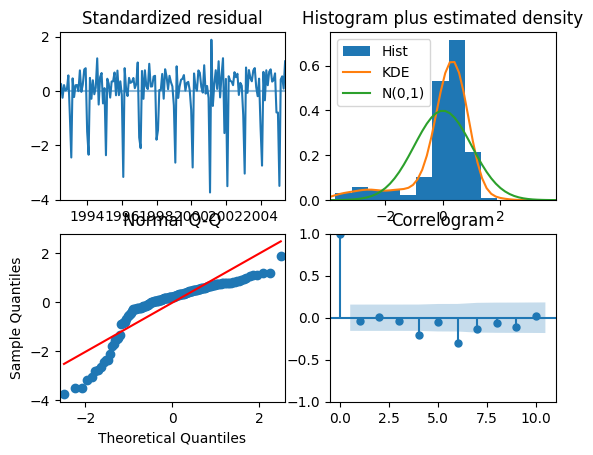

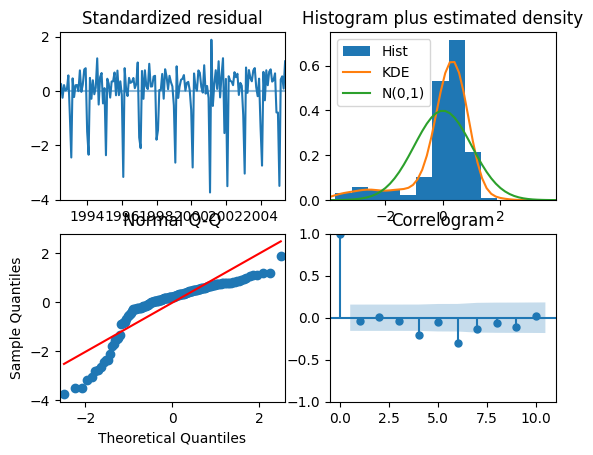

In [172]:
forecaster_1.regressor.plot_diagnostics()

In [127]:
forecaster_1.regressor.arima_res_.fittedvalues

date
1992-04-01    0.000000
1992-05-01    0.371971
1992-06-01    0.355788
1992-07-01    0.402180
1992-08-01    0.464897
                ...   
2005-02-01    1.146735
2005-03-01    0.632435
2005-04-01    0.706293
2005-05-01    0.669381
2005-06-01    0.764826
Freq: MS, Length: 159, dtype: float64

In [128]:
forecaster_2.regressor.arima_res_.fittedvalues

date
2004-10-01    0.000000
2004-11-01    1.156641
2004-12-01    1.190377
2005-01-01    1.228937
2005-02-01    1.151603
2005-03-01    0.632435
2005-04-01    0.706293
2005-05-01    0.669381
2005-06-01    0.764826
Freq: MS, dtype: float64

In [94]:
# Params
print(forecaster_1.regressor.arima_res_.params)
print(forecaster_2.regressor.arima_res_.params)
print('')

# Array containing autoregressive lag polynomial coefficients, ordered from lowest degree to highest. 
# Initialized with ones, unless a coefficient is constrained to be zero (in which case it is zero).
print(forecaster_1.regressor.arima_res_.polynomial_ar)
print(forecaster_2.regressor.arima_res_.polynomial_ar)
print('')

# Array containing moving average lag polynomial coefficients, ordered from lowest degree to highest. 
# Initialized with ones, unless a coefficient is constrained to be zero (in which case it is zero).print(forecaster_1.regressor.arima_res_.polynomial_ar)
print(forecaster_1.regressor.arima_res_.polynomial_ma)
print(forecaster_2.regressor.arima_res_.polynomial_ma)

ar.L1    -0.278167
ar.L2     0.208110
ar.L3     0.905169
ar.L4     0.149358
ar.L5    -0.038833
ma.L1     1.292218
ma.L2     0.998973
sigma2    0.018479
dtype: float64
ar.L1    -0.278167
ar.L2     0.208110
ar.L3     0.905169
ar.L4     0.149358
ar.L5    -0.038833
ma.L1     1.292218
ma.L2     0.998973
sigma2    0.018479
dtype: float64

[ 1.          0.2781674  -0.2081097  -0.9051687  -0.14935803  0.03883274]
[ 1.          0.2781674  -0.2081097  -0.9051687  -0.14935803  0.03883274]

[1.         1.29221759 0.99897309]
[1.         1.29221759 0.99897309]


In [44]:
data_train['y'].iloc[-1:]

date
2005-06-01    0.842263
Freq: MS, Name: y, dtype: float64

In [47]:
forecaster_2.regressor.arima_res_.polynomial_ma

array([ 1.        , -1.29225707,  0.48184762,  0.48315573, -1.29717801,
        0.98581836])

In [42]:
# Array containing seasonal autoregressive lag polynomial coefficients, ordered from lowest degree to highest. 
# Initialized with ones, unless a coefficient is constrained to be zero (in which case it is zero).
print(forecaster_1.regressor.arima_res_.polynomial_seasonal_ar)
print(forecaster_2.regressor.arima_res_.polynomial_seasonal_ar)
print('')

# Array containing seasonal moving average lag polynomial coefficients, ordered from lowest degree to highest.
# Initialized with ones, unless a coefficient is constrained to be zero (in which case it is zero).
print(forecaster_1.regressor.arima_res_.polynomial_seasonal_ma)
print(forecaster_2.regressor.arima_res_.polynomial_seasonal_ma)

[1.]
[1.]

[1.]
[1.]


In [43]:
# Array containing trend polynomial coefficients, ordered from lowest degree to highest. 
# Initialized with ones, unless a coefficient is constrained to be zero (in which case it is zero).
print(forecaster_1.regressor.arima_res_.polynomial_trend)
print(forecaster_2.regressor.arima_res_.polynomial_trend)
print('')

# The orders of each of the polynomials in the model.
print(forecaster_1.regressor.arima_res_.model_orders)
print(forecaster_2.regressor.arima_res_.model_orders)
print('')

# List of parameters actually included in the model, in sorted order.
print(forecaster_1.regressor.arima_res_.param_terms)
print(forecaster_2.regressor.arima_res_.param_terms)

[]
[]

{'trend': 0, 'exog': 0, 'ar': 5, 'ma': 5, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 5, 'reduced_ma': 5, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
{'trend': 0, 'exog': 0, 'ar': 5, 'ma': 5, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 5, 'reduced_ma': 5, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}

['ar', 'ma', 'variance']
['ar', 'ma', 'variance']


In [26]:
data_train['y'].iloc[-6:]

date
2005-01-01    1.170690
2005-02-01    0.597639
2005-03-01    0.652590
2005-04-01    0.670505
2005-05-01    0.695248
2005-06-01    0.842263
Freq: MS, Name: y, dtype: float64

In [30]:
data_train['exog_1'].iloc[-5:]

date
2005-02-01    1.520544
2005-03-01    1.506290
2005-04-01    1.487660
2005-05-01    1.457025
2005-06-01    1.441765
Freq: MS, Name: exog_1, dtype: float64

In [124]:
forecaster = ForecasterSarimax(
                regressor = ARIMA(order=(5,0,0), seasonal_order=(0, 0, 0, 0), trend=None, with_intercept=False, maxiter=1000, suppress_warnings=True)
            )
forecaster.fit(y=data_train['y'], exog=data_train['exog_1'])
forecaster.predict(steps=5, exog=data_test['exog_1'])

2005-07-01    0.955160
2005-08-01    0.999309
2005-09-01    1.006797
2005-10-01    0.966844
2005-11-01    0.899705
Freq: MS, Name: pred, dtype: float64

In [ ]:
forecaster.regressor.arima_res_.apply(
    endog = last_window,
    exog  = last_window_exog,
    refit = False
)

In [125]:
forecaster.regressor.arima_res_.fittedvalues

date
1992-04-01    0.586089
1992-05-01    0.448589
1992-06-01    0.453344
1992-07-01    0.509825
1992-08-01    0.580687
                ...   
2005-02-01    0.959333
2005-03-01    0.585896
2005-04-01    0.648927
2005-05-01    0.655163
2005-06-01    0.782031
Freq: MS, Length: 159, dtype: float64

In [29]:
forecaster.predict(
    steps=5,
    exog=data_test['exog_1'],
    last_window=data_train['y'].iloc[-5:],
    last_window_exog=data_train['exog_1'].iloc[-5:]
)

2005-07-01    0.757604
2005-08-01    0.684084
2005-09-01    0.618403
2005-10-01    0.560564
2005-11-01    0.571627
Freq: MS, Name: pred, dtype: float64

In [32]:
forecaster.predict(
    steps=5,
    exog=data_test['exog_1'],
    last_window=data_train['y'].iloc[-5:],
    last_window_exog=data_train['y'].iloc[-5:]
)

2005-07-01    1.348155
2005-08-01    1.327842
2005-09-01    1.312205
2005-10-01    1.287929
2005-11-01    1.287166
Freq: MS, Name: pred, dtype: float64

In [11]:
forecaster.predict_interval(steps=5, exog=data_test['exog_1'])

,pred,lower_bound,upper_bound
2005-07-01,0.932642,0.696401,1.168883
2005-08-01,1.010520,0.740315,1.280726
2005-09-01,1.033868,0.761807,1.305928
2005-10-01,0.988795,0.712712,1.264877
2005-11-01,0.945110,0.652227,1.237994


In [12]:
forecaster.predict_interval(
    steps=5,
    exog=data_test['exog_1'],
    last_window=data_train['y'].iloc[-6:],
    last_window_exog=data_train['exog_1'].iloc[-6:]
)

,pred,lower_bound,upper_bound
2005-07-01,0.804699,0.533423,1.075975
2005-08-01,0.795028,0.446933,1.143122
2005-09-01,0.780490,0.408405,1.152576
2005-10-01,0.742509,0.374417,1.110601
2005-11-01,0.735371,0.378384,1.092358


## Test predict interval

In [94]:
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )

transformer_exog = ColumnTransformer(
                        [('scale', StandardScaler(), ['exog_1']),
                        ('onehot', OneHotEncoder(), ['exog_2'])],
                        remainder = 'passthrough',
                        verbose_feature_names_out = False
                    )

df_exog = pd.DataFrame({
                  'exog_1': exog,
                  'exog_2': ['a']*25+['b']*25}
              )

In [96]:
kwargs = {'order': (1,1,1), 'seasonal_order': (0,0,0,0)}
forecaster = ForecasterSarimax(
                regressor = ARIMA(**kwargs),
                transformer_y    = StandardScaler(),
                transformer_exog = transformer_exog
            )
forecaster.fit(y=y, exog=df_exog)
predictions = forecaster.predict_interval(steps=5, exog=df_exog, alpha=0.05)
predictions.values

array([[0.90846704, 0.47796249, 1.33897159],
       [0.7647883 , 0.33209942, 1.19747719],
       [0.82033368, 0.38757178, 1.25309559],
       [0.84058598, 0.40781874, 1.27335322],
       [0.89169909, 0.4589314 , 1.32446679]])

In [92]:
alpha=0.05
interval=[1,99]
alpha=None
interval=[2.5,97.5]

forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)), transformer_y = StandardScaler())
forecaster.fit(y=y)
predictions = forecaster.predict_interval(steps=5, alpha=alpha, interval=interval)
expected = pd.DataFrame(
                data    = np.array([[0.53572671, 0.07602913, 0.99542429],
                                    [0.52359439, 0.05626217, 0.99092661],
                                    [0.52216565, 0.05439018, 0.98994111],
                                    [0.52249851, 0.05467184, 0.99032517],
                                    [0.52312129, 0.05528678, 0.99095581]]),
                columns = ['pred', 'lower_bound', 'upper_bound'],
                index   = pd.RangeIndex(start=50, stop=55, step=1)
            )

pd.testing.assert_frame_equal(predictions, expected)

In [88]:
alpha=0.05
interval=[1,99]
# alpha=None
# interval=[2.5,97.5]

forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
forecaster.fit(y=y, exog=exog)
predictions = forecaster.predict_interval(steps=5, exog=exog, alpha=alpha, interval=interval)
expected = pd.DataFrame(
                data    = np.array([[0.60497852,  0.15960892, 1.05034811],
                                    [0.44483443, -0.00619962, 0.89586848],
                                    [0.49239874,  0.04107972, 0.94371776],
                                    [0.50520397,  0.05385485, 0.95655309],
                                    [0.54934541,  0.09799221, 1.00069861]]),
                columns = ['pred', 'lower_bound', 'upper_bound'],
                index   = pd.RangeIndex(start=50, stop=55, step=1)
            )

pd.testing.assert_frame_equal(predictions, expected)

In [107]:
alpha=0.05

y_datetime = pd.Series(data=list(y))
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
lw_datetime = pd.Series(data=list(y))
lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

exog_datetime = pd.Series(data=list(exog))
exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
lw_exog_datetime = pd.Series(data=list(exog))
lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
forecaster.fit(y=y_datetime, exog=exog_datetime)
predictions = forecaster.predict_interval(
                    steps            = 5, 
                    alpha            = 0.05,
                    exog             = exog_datetime, 
                    last_window      = lw_datetime, 
                    last_window_exog = lw_exog_datetime
                )

c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:250: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  exog = exog.to_frame(name=exog.name)
c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:544: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  last_window_exog = last_window_exog.to_frame(name=exog.name)
c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:563: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be us

In [114]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
forecaster.fit(y=pd.Series(np.arange(10)))
forecaster.get_feature_importance().values

c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([['intercept', 0.49998574676910396],
       ['ar.L1', 0.5000130662306124],
       ['ma.L1', 7.479723906909597e-11],
       ['sigma2', 2.658043128694438e-12]], dtype=object)

In [109]:
forecaster.regressor.params()


intercept    0.000368
0           -0.216186
ar.L1        0.141695
ma.L1       -0.999727
sigma2       0.050643
dtype: float64

In [4]:
import re
from typing import Type
import pytest
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.exceptions import NotFittedError
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection import backtesting_forecaster

In [12]:
forecaster = ForecasterAutoreg(
                regressor = Ridge(random_state=123),
                lags      = 1
                )

initial_train_size = forecaster.window_size

err_msg = re.escape(
        f"`initial_train_size` must be greater than "
        f"forecaster's window_size ({forecaster.window_size})."
    )
with pytest.raises(ValueError, match = err_msg):
    backtesting_forecaster(
        forecaster          = forecaster,
        y                   = y,
        steps               = 3,
        metric              = 'mean_absolute_error',
        initial_train_size  = initial_train_size,
        refit               = False,
        fixed_train_size    = False,
        exog                = None,
        interval            = None,
        n_boot              = 500,
        random_state        = 123,
        in_sample_residuals = True,
        verbose             = False
    )

AssertionError: Regex pattern "`initial_train_size`\\ must\\ be\\ greater\\ than\\ forecaster's\\ window_size\\ \\(1\\)\\." does not match 'The maximum lag (1) must be less than the length of the series (1).'.

In [8]:
y

0     0.696469
1     0.286139
2     0.226851
3     0.551315
4     0.719469
5     0.423106
6     0.980764
7     0.684830
8     0.480932
9     0.392118
10    0.343178
11    0.729050
12    0.438572
13    0.059678
14    0.398044
15    0.737995
16    0.182492
17    0.175452
18    0.531551
19    0.531828
20    0.634401
21    0.849432
22    0.724455
23    0.611024
24    0.722443
25    0.322959
26    0.361789
27    0.228263
28    0.293714
29    0.630976
30    0.092105
31    0.433701
32    0.430863
33    0.493685
34    0.425830
35    0.312261
36    0.426351
37    0.893389
38    0.944160
39    0.501837
40    0.623953
41    0.115618
42    0.317285
43    0.414826
44    0.866309
45    0.250455
46    0.483034
47    0.985560
48    0.519485
49    0.612895
Name: y, dtype: float64

In [11]:
import re
import pytest
from pytest import approx
import numpy as np
import pandas as pd
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from sklearn.exceptions import NotFittedError
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect

In [45]:
series = pd.DataFrame({'l1': pd.Series(np.arange(10)), 
                        'l2': pd.Series(np.random.rand(10))
                        })
exog = pd.Series(np.arange(10), name='exog')

In [61]:
forecaster = ForecasterAutoregMultiVariate(
                         regressor = RandomForestRegressor(random_state=123),
                         level     = 'l2',
                         lags      = 3,
                         steps     = 2,
                     )
forecaster.fit(series=series, exog=exog)

In [62]:
forecaster.regressors_[1].feature_importances_

array([0.04433023, 0.06593663, 0.04126985, 0.21969712, 0.423652  ,
       0.18296598, 0.0221482 ])

In [63]:
forecaster.regressors_[2].feature_importances_

array([0.01352571, 0.05085389, 0.06176128, 0.57891741, 0.19316456,
       0.06913955, 0.03263761])

In [64]:
forecaster.get_feature_importance(step=2)

,feature,importance
0,l1_lag_1,0.013526
1,l1_lag_2,0.050854
2,l1_lag_3,0.061761
3,l2_lag_1,0.578917
4,l2_lag_2,0.193165
5,l2_lag_3,0.069140
6,exog_step_2,0.032638


In [14]:
forecaster = ForecasterAutoregDirect(
                         regressor = RandomForestRegressor(random_state=123),
                         lags      = 3,
                         steps     = 2,
                         transformer_y=StandardScaler(),
                     )
forecaster.fit(y=series['l1'], exog=exog)

In [15]:
forecaster.predict(exog=exog)

10    6.41
11    7.41
Name: pred, dtype: float64

In [4]:
import re
import pytest

steps = 10

last_step = max(steps) if isinstance(steps, list) else steps
err_msg = re.escape(
            f'`exog` must have at least as many values as the distance to '
            f'the maximum step predicted, {last_step}.'
        )
with pytest.raises(ValueError, match = err_msg):
    check_predict_input(
        forecaster_type  = 'ForecasterAutoreg',
        steps            = steps,
        fitted           = True,
        included_exog    = True,
        index_type       = pd.DatetimeIndex,
        index_freq       = 'M',
        window_size      = 5,
        last_window      = pd.Series(np.arange(10), index=pd.date_range(start='1/1/2018', periods=10, freq='M')),
        last_window_exog = None,
        exog             = pd.Series(np.arange(5)),
        exog_type        = None,
        exog_col_names   = None,
        interval         = None,
        alpha            = None,
        max_steps        = None,
        levels           = None,
        series_col_names = None
    )

In [5]:
aa = pd.Series(np.arange(5))

In [6]:
aa.index

RangeIndex(start=0, stop=5, step=1)

In [13]:
pd.RangeIndex(start=11, stop=15)

RangeIndex(start=11, stop=15, step=1)

In [16]:
exog_datetime = pd.Series(data=np.random.rand(10))
exog_datetime.index = pd.RangeIndex(start=12, stop=22)
lw_datetime = pd.Series(data=np.random.rand(10))
lw_datetime.index = pd.RangeIndex(start=0, stop=10)

expected_index = 10

err_msg = re.escape(
        (f'To make predictions `exog` must start one step ahead of `last_window` end.\n'
            f'    `last_window` ends at : {lw_datetime.index[-1]}.\n'
            f'    Expected index        : {expected_index}.\n'
            f'    `exog` starts at      : {exog_datetime.index[0]}.')
    )
with pytest.raises(ValueError, match = err_msg):
    check_predict_input(
        forecaster_type  = 'ForecasterAutoreg',
        steps            = 10,
        fitted           = True,
        included_exog    = True,
        index_type       = pd.RangeIndex,
        index_freq       = 'M',
        window_size      = 5,
        last_window      = lw_datetime,
        last_window_exog = None,
        exog             = exog_datetime,
        exog_type        = pd.Series,
        exog_col_names   = None,
        interval         = None,
        alpha            = None,
        max_steps        = None,
        levels           = None,
        series_col_names = None
    )

In [35]:
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.utils import expand_index
from pmdarima.arima import ARIMA

forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
forecaster.fit(y=y, exog=exog)
last_window_exog=pd.Series(np.random.rand(50),
           index = pd.RangeIndex(start=50, stop=100))

err_msg = re.escape(
        ('To make predictions unrelated to the original data, both '
            '`last_window` and `last_window_exog` must be provided.')
        )   
with pytest.raises(ValueError, match = err_msg):
    forecaster.predict(steps=5, exog=exog_predict, last_window=None, last_window_exog=last_window_exog)

In [33]:
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )

In [34]:
exog_predict = pd.Series(
                  data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                                   0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234]
                      ),
                  name = 'exog',
                  index = pd.RangeIndex(start=50, stop=60)
              )
exog_predict  

50    0.120629
51    0.826341
52    0.603060
53    0.545068
54    0.342764
55    0.304121
56    0.417022
57    0.681301
58    0.875457
59    0.510422
Name: exog, dtype: float64

In [42]:
    y_datetime = pd.Series(data=list(y))
    y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
    lw_datetime = pd.Series(data=list(y))
    lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

    exog_datetime = pd.Series(data=list(exog))
    exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
    exog_pred_datetime = pd.Series(data=list(exog_predict))
    exog_pred_datetime.index = pd.date_range(start='2100', periods=10, freq='A')
    lw_exog_datetime = pd.Series(data=list(exog))
    lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

    forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
    forecaster.fit(y=y_datetime, exog=exog_datetime)
    predictions = forecaster.predict(
                      steps            = 5, 
                      exog             = exog_pred_datetime, 
                      last_window      = lw_datetime, 
                      last_window_exog = lw_exog_datetime
                  )

c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:250: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  exog = exog.to_frame(name=exog.name)
c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:380: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  last_window_exog = last_window_exog.to_frame(name=exog.name)
c:\Users\jaesc2\GitHub\skforecast\skforecast\ForecasterSarimax\ForecasterSarimax.py:399: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be us

In [57]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
forecaster.fit(y=y, exog=exog)
lw = pd.Series(np.random.rand(10), index=pd.RangeIndex(start=50, stop=60))
exog_predict = pd.Series(np.random.rand(10), index=pd.RangeIndex(start=60, stop=70))

err_msg = re.escape(
            ('Forecaster trained with exogenous variable/s. To make predictions '
             'unrelated to the original data, same variable/s must be provided '
             'using `last_window_exog`.')
            )   
with pytest.raises(ValueError, match = err_msg):
    forecaster.predict(steps=5, exog=exog_predict, last_window=lw, last_window_exog=None)

In [46]:
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )

exog_predict = pd.Series(
                  data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                                   0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234]
                      ),
                  name = 'exog',
                  index = pd.RangeIndex(start=50, stop=60)
              )

In [5]:
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )

exog_predict = pd.Series(
                  data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                                   0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234]
                      ),
                  name = 'exog',
                  index = pd.RangeIndex(start=50, stop=60)
              )

In [20]:
import re
import pytest
import numpy as np
import pandas as pd
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.utils import expand_index
from pmdarima.arima import ARIMA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

y_datetime = pd.Series(data=list(y))
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
y_datetime.name = 'y'
lw_datetime = pd.Series(data=list(y))
lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

df_exog = pd.DataFrame({'exog_1': exog, 'exog_2': ['a']*25+['b']*25})
df_exog.index = pd.date_range(start='2000', periods=50, freq='A')
df_lw_exog = df_exog.copy()
df_lw_exog.index = pd.date_range(start='2050', periods=50, freq='A')
df_exog_pred = df_exog.copy()
df_exog_pred.index = pd.date_range(start='2100', periods=50, freq='A')

transformer_exog = ColumnTransformer(
                        [('scale', StandardScaler(), ['exog_1']),
                         ('onehot', OneHotEncoder(), ['exog_2'])],
                         remainder = 'passthrough',
                         verbose_feature_names_out = False
                    )

In [21]:
lw_datetime.head()

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, dtype: float64

In [22]:
lw_datetime.name = 'y'

In [24]:
forecaster = ForecasterSarimax(
                    regressor        = ARIMA(order=(1,1,1))
                )
forecaster.fit(y=y_datetime)
forecaster.predict(
    steps            = 5, 
    last_window      = lw_datetime
)


2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, dtype: float64


2100-12-31    0.549296
2101-12-31    0.539391
2102-12-31    0.538325
2103-12-31    0.538715
2104-12-31    0.539344
Freq: A-DEC, Name: pred, dtype: float64

In [26]:
lw_datetime.name = 'y'
lw_datetime.head()

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64

In [27]:
forecaster = ForecasterSarimax(
                    regressor        = ARIMA(order=(1,1,1)), 
                    transformer_y    = StandardScaler()
                )
forecaster.fit(y=y_datetime)
forecaster.predict(
    steps            = 5, 
    last_window      = lw_datetime
)

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
2050-12-31    0.837129
2051-12-31   -0.927922
2052-12-31   -1.182952
2053-12-31    0.212741
2054-12-31    0.936063
Freq: A-DEC, dtype: float64


2100-12-31    0.549429
2101-12-31    0.539552
2102-12-31    0.538494
2103-12-31    0.538888
2104-12-31    0.539521
Freq: A-DEC, Name: pred, dtype: float64

In [28]:
lw_datetime

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
2055-12-31    0.423106
2056-12-31    0.980764
2057-12-31    0.684830
2058-12-31    0.480932
2059-12-31    0.392118
2060-12-31    0.343178
2061-12-31    0.729050
2062-12-31    0.438572
2063-12-31    0.059678
2064-12-31    0.398044
2065-12-31    0.737995
2066-12-31    0.182492
2067-12-31    0.175452
2068-12-31    0.531551
2069-12-31    0.531828
2070-12-31    0.634401
2071-12-31    0.849432
2072-12-31    0.724455
2073-12-31    0.611024
2074-12-31    0.722443
2075-12-31    0.322959
2076-12-31    0.361789
2077-12-31    0.228263
2078-12-31    0.293714
2079-12-31    0.630976
2080-12-31    0.092105
2081-12-31    0.433701
2082-12-31    0.430863
2083-12-31    0.493685
2084-12-31    0.425830
2085-12-31    0.312261
2086-12-31    0.426351
2087-12-31    0.893389
2088-12-31    0.944160
2089-12-31    0.501837
2090-12-31    0.623953
2091-12-31    0.115618
2092-12-31    0.317285
2093-12-31 

In [29]:
forecaster = ForecasterSarimax(
                    regressor        = ARIMA(order=(1,1,1)), 
                    transformer_y    = StandardScaler(),
                    transformer_exog = transformer_exog
                )
forecaster.fit(y=y_datetime, exog=df_exog)
forecaster.predict(
    steps            = 5, 
    exog             = df_exog_pred, 
    last_window      = lw_datetime, 
    last_window_exog = df_lw_exog
)

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
2050-12-31    0.837129
2051-12-31   -0.927922
2052-12-31   -1.182952
2053-12-31    0.212741
2054-12-31    0.936063
Freq: A-DEC, dtype: float64


2100-12-31    1.088376
2101-12-31    0.959666
2102-12-31    1.016456
2103-12-31    1.036812
2104-12-31    1.087934
Freq: A-DEC, Name: pred, dtype: float64

In [30]:
exog = pd.DataFrame({'exog_1': exog, 'exog_2': ['a']*25+['b']*25})
exog = exog['exog_1'].copy()
exog.index = pd.date_range(start='2000', periods=50, freq='A')
lw_exog = exog.copy()
lw_exog.index = pd.date_range(start='2050', periods=50, freq='A')
exog_pred = exog.copy()
exog_pred.index = pd.date_range(start='2100', periods=50, freq='A')

In [32]:
exog.head()

2000-12-31    0.120629
2001-12-31    0.826341
2002-12-31    0.603060
2003-12-31    0.545068
2004-12-31    0.342764
Freq: A-DEC, Name: exog_1, dtype: float64

In [33]:
lw_exog.head()

2050-12-31    0.120629
2051-12-31    0.826341
2052-12-31    0.603060
2053-12-31    0.545068
2054-12-31    0.342764
Freq: A-DEC, Name: exog_1, dtype: float64

In [34]:
forecaster = ForecasterSarimax(
                    regressor        = ARIMA(order=(1,1,1)), 
                    transformer_y    = StandardScaler(),
                    transformer_exog = StandardScaler()
                )
forecaster.fit(y=y_datetime, exog=exog)
forecaster.predict(
    steps            = 5, 
    exog             = exog_pred, 
    last_window      = lw_datetime, 
    last_window_exog = lw_exog
)

2050-12-31    0.696469
2051-12-31    0.286139
2052-12-31    0.226851
2053-12-31    0.551315
2054-12-31    0.719469
Freq: A-DEC, Name: y, dtype: float64
2050-12-31    0.837129
2051-12-31   -0.927922
2052-12-31   -1.182952
2053-12-31    0.212741
2054-12-31    0.936063
Freq: A-DEC, dtype: float64


2100-12-31    0.614260
2101-12-31    0.455223
2102-12-31    0.503035
2103-12-31    0.515887
2104-12-31    0.560093
Freq: A-DEC, Name: pred, dtype: float64

In [19]:
import re
import pytest
import numpy as np
import pandas as pd
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.utils import expand_index
from pmdarima.arima import ARIMA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

ModuleNotFoundError: No module named 'skforecast'

In [13]:
# Fixtures ForecasterSarimax
# ==============================================================================
import numpy as np
import pandas as pd

# Fixtures
# np.random.seed(123)
# y = np.random.rand(50)
# exog = np.random.rand(50)
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )

exog_predict = pd.Series(
                  data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                                   0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234]
                      ),
                  name = 'exog',
                  index = pd.RangeIndex(start=50, stop=60)
               )

df_exog = pd.DataFrame({
              'exog_1': exog,
              'exog_2': ['a']*25+['b']*25}
          )
df_exog_predict = df_exog.copy()
df_exog_predict.index = pd.RangeIndex(start=50, stop=100)

y_datetime = pd.Series(data=list(y))
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
y_datetime.name = 'y'

# lw_datetime = pd.Series(data=y)
# lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')
# lw_datetime.name = 'y'

# exog_datetime = pd.Series(data=exog)
# exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
# exog_datetime.name = 'exog'

# lw_exog_datetime = pd.Series(data=exog)
# lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')
# lw_exog_datetime.name = 'exog'

# exog_predict_datetime = pd.Series(data=exog_predict)
# exog_predict_datetime.index = pd.date_range(start='2100', periods=10, freq='A')
# exog_predict_datetime.name = 'exog'

# df_exog_datetime = df_exog.copy()
# df_exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')

# df_lw_exog_datetime = df_exog.copy()
# df_lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

# df_exog_predict_datetime = df_exog.copy()
# df_exog_predict_datetime.index = pd.date_range(start='2100', periods=50, freq='A')

In [14]:
y.head()

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: y, dtype: float64

In [15]:
y_datetime = pd.Series(data=y.values)
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
y_datetime.name = 'y'

In [4]:
# Fixtures ForecasterSarimax
# ==============================================================================
import numpy as np
import pandas as pd

# Fixtures
# np.random.seed(123)
# y = np.random.rand(50)
# exog = np.random.rand(50)
y = pd.Series(
        data = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
                         0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
                         0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
                         0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
                         0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
                         0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
                         0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
                         0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
                         0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
                         0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453]
            ),
        name = 'y'
    )

exog = pd.Series(
           data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                            0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
                            0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
                            0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
                            0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
                            0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
                            0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513249,
                            0.84167   , 0.35739757, 0.04359146, 0.30476807, 0.39818568,
                            0.70495883, 0.99535848, 0.35591487, 0.76254781, 0.59317692,
                            0.6917018 , 0.15112745, 0.39887629, 0.2408559 , 0.34345601]
               ),
           name = 'exog'
       )

exog_predict = pd.Series(
                  data = np.array([0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
                                   0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234]
                      ),
                  name = 'exog',
                  index = pd.RangeIndex(start=50, stop=60)
               )

df_exog = pd.DataFrame({
              'exog_1': exog.values,
              'exog_2': ['a']*25+['b']*25}
          )
df_exog_predict = df_exog.copy()
df_exog_predict.index = pd.RangeIndex(start=50, stop=100)

y_datetime = pd.Series(data=y.values)
y_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
y_datetime.name = 'y'

lw_datetime = pd.Series(data=y.values)
lw_datetime.index = pd.date_range(start='2050', periods=50, freq='A')
lw_datetime.name = 'y'

exog_datetime = pd.Series(data=exog.values)
exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')
exog_datetime.name = 'exog'

lw_exog_datetime = pd.Series(data=exog.values)
lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')
lw_exog_datetime.name = 'exog'

exog_predict_datetime = pd.Series(data=exog_predict.values)
exog_predict_datetime.index = pd.date_range(start='2100', periods=10, freq='A')
exog_predict_datetime.name = 'exog'

df_exog_datetime = df_exog.copy()
df_exog_datetime.index = pd.date_range(start='2000', periods=50, freq='A')

df_lw_exog_datetime = df_exog.copy()
df_lw_exog_datetime.index = pd.date_range(start='2050', periods=50, freq='A')

df_exog_predict_datetime = df_exog.copy()
df_exog_predict_datetime.index = pd.date_range(start='2100', periods=50, freq='A')

In [79]:
import sys

print(sys.getsizeof(y_datetime.iloc[-2:].index))
print(sys.getsizeof(y_datetime.index))
print(sys.getsizeof(y_datetime.values))
print(sys.getsizeof(pd.date_range(start='2000', periods=100000, freq='s')))

32
2520
512
800016


In [65]:
y.iloc[-2:].index

RangeIndex(start=48, stop=50, step=1)

In [66]:
expand_index(index=y_datetime.iloc[-2:].index, steps=1)

DatetimeIndex(['2050-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [67]:
expand_index(index=y.iloc[-2:].index, steps=1)

RangeIndex(start=50, stop=51, step=1)

In [5]:
transformer_exog = ColumnTransformer(
                           [('scale', StandardScaler(), ['exog_1']),
                            ('onehot', OneHotEncoder(), ['exog_2'])],
                           remainder = 'passthrough',
                           verbose_feature_names_out = False
                       )

In [6]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)),
                     transformer_y    = StandardScaler(),
                     #transformer_exog = transformer_exog
                     )
forecaster.fit(y=y_datetime, #exog=df_exog_datetime
)
forecaster.predict_interval(
                      steps            = 5, alpha=0.05,
                    #exog             = df_exog_predict_datetime, 
                      last_window      = lw_datetime, 
                      #last_window_exog = df_lw_exog_datetime
                  ).values

array([[0.54942884, 0.09196387, 1.00689381],
       [0.53955162, 0.07520018, 1.00390307],
       [0.53849403, 0.0738371 , 1.00315095],
       [0.53888797, 0.07420296, 1.00357299],
       [0.53952081, 0.07483176, 1.00420986]])

In [ ]:
its = 40
f.lw = 0 - 40
steps=3

fold0
0-40
last_window = None


fold1
last_window = y.iloc[41, 42, 43]
last_window = 0 - 43
f.lw = 0 - 40
exception 41

41, 42, 43


51, 52, 53

48,49,50
0-40 + 41-49

In [9]:
from skforecast.model_selection_sarimax import backtesting_sarimax

forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
steps = 3

metric, backtest_predictions = backtesting_sarimax(
                                    forecaster         = forecaster,
                                    y                  = y,
                                    steps              = steps,
                                    metric             = 'mean_squared_error',
                                    initial_train_size = len(y)-12,
                                    fixed_train_size   = False,
                                    refit              = False,
                                    alpha              = None,
                                    interval           = None,
                                    verbose            = True
                                )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 38
Number of observations used for backtesting: 12
    Number of folds: 4
    Number of steps per fold: 3

Data partition in fold: 0
    Training:   0 -- 37  (n=38)
    Validation: 38 -- 40  (n=3)
Data partition in fold: 1
    Training:   0 -- 37  (n=38)
    Validation: 41 -- 43  (n=3)
Data partition in fold: 2
    Training:   0 -- 37  (n=38)
    Validation: 44 -- 46  (n=3)
Data partition in fold: 3
    Training:   0 -- 37  (n=38)
    Validation: 47 -- 49  (n=3)

RangeIndex(start=0, stop=38, step=1)
RangeIndex(start=0, stop=41, step=1)
RangeIndex(start=0, stop=44, step=1)
RangeIndex(start=0, stop=47, step=1)


In [6]:
metric

0.074376574197378

In [7]:
backtest_predictions

,pred
38,0.540526
39,0.473096
40,0.459199
41,0.498688
42,0.473945
43,0.468053
44,0.444655
45,0.449000
46,0.448564
47,0.458242


In [19]:
y.tail()

45    0.250455
46    0.483034
47    0.985560
48    0.519485
49    0.612895
Name: y, dtype: float64

In [20]:
lw = y.copy()
lw.index = pd.RangeIndex(start=50, stop=100)
lw.head()

50    0.696469
51    0.286139
52    0.226851
53    0.551315
54    0.719469
Name: y, dtype: float64

In [12]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))
forecaster.fit(y=y)

In [21]:
forecaster.predict(steps=5, last_window=lw)

100    0.549296
101    0.539391
102    0.538325
103    0.538715
104    0.539344
Name: pred, dtype: float64

In [40]:
import pandas as pd

params = [{'a':1., 'b':'a'}, {'a': 2., 'b':'b'}]
df = pd.DataFrame({'params':params})
pd.concat([df, df['params'].apply(pd.Series)], axis=1)

,params,a,b
0,"{'a': 1.0, 'b': 'a'}",1.0,a
1,"{'a': 2.0, 'b': 'b'}",2.0,b


In [44]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries
from skforecast.model_selection_multiseries import random_search_forecaster_multiseries

In [41]:
# Data download
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/' +
       'data/guangyuan_air_pollution.csv')
data = pd.read_csv(url, sep=',')

# Data preparation
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()
data = data[['CO', 'SO2', 'PM2.5']]
data.head()

,CO,SO2,PM2.5
date,,,
2013-03-01,9600.0,204.0,181.0
2013-03-02,20198.0,674.0,633.0
2013-03-03,47195.0,1661.0,1956.0
2013-03-04,15000.0,485.0,438.0
2013-03-05,59594.0,2001.0,3388.0


In [42]:
# Split data into train-val-test
# ==============================================================================
end_train = '2016-05-31 23:59:00'
data_train = data.loc[:end_train, :].copy()
data_test  = data.loc[end_train:, :].copy()

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2013-03-01 00:00:00 --- 2016-05-31 00:00:00  (n=1188)
Test dates  : 2016-06-01 00:00:00 --- 2017-02-28 00:00:00  (n=273)


In [45]:
# Create and fit forecaster MultiVariate
# ==============================================================================
forecaster = ForecasterAutoregMultiVariate(
                 regressor          = Ridge(random_state=123),
                 level              = 'CO',
                 lags               = 7,
                 steps              = 7,
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None
             )

forecaster.fit(series=data_train)
forecaster

ForecasterAutoregMultiVariate 
Regressor: Ridge(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for series: None 
Transformer for exog: None 
Window size: 7 
Multivariate series (names): ['CO', 'SO2', 'PM2.5'] 
Maximum steps predicted: 7 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2013-03-01 00:00:00'), Timestamp('2016-05-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-01-19 17:21:04 
Last fit date: 2023-01-19 17:21:04 
Skforecast version: 0.7.dev 
Python version: 3.9.13 

In [46]:
# Backtesting MultiVariate
# ==============================================================================
metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
                                           forecaster         = forecaster,
                                           series             = data,
                                           steps              = 7,
                                           metric             = 'mean_absolute_error',
                                           initial_train_size = len(data_train),
                                           refit              = False,
                                           fixed_train_size   = False,
                                           verbose            = False
                                       )

print("Backtest metrics")
display(metrics_levels)
print("")
print("Backtest predictions")
backtest_predictions.head(4)

Backtest metrics


,levels,mean_absolute_error
0,CO,14931.121425



Backtest predictions


,CO
2016-06-01,20244.442039
2016-06-02,23307.697174
2016-06-03,22487.345075
2016-06-04,23111.643246


In [47]:
# Create and forecaster MultiVariate
# ==============================================================================
forecaster = ForecasterAutoregMultiVariate(
                 regressor          = RandomForestRegressor(random_state=123),
                 level              = 'CO',
                 lags               = 7,
                 steps              = 7,
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None
             )

In [49]:
# Random search MultiVariate
# ==============================================================================
lags_grid = [7, 14]
param_distributions = {'n_estimators': np.arange(start=10, stop=20, step=1, dtype=int),
                       'criterion': ['squared_error', 'absolute_error']}

results = random_search_forecaster_multiseries(
              forecaster          = forecaster,
              series              = data,
              exog                = None,
              lags_grid           = lags_grid,
              param_distributions = param_distributions,
              steps               = 7,
              metric              = 'mean_absolute_error',
              initial_train_size  = len(data_train),
              refit               = False,
              fixed_train_size    = False,
              n_iter              = 5,
              return_best         = False,
              verbose             = False
          )

results

10 models compared for 1 level(s). Number of iterations: 10.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:44<00:00, 22.25s/it]


,levels,lags,params,mean_absolute_error,n_estimators,criterion
5,[CO],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 14, 'criterion': 'absolute_er...",15542.203297,14,absolute_error
8,[CO],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 17, 'criterion': 'absolute_er...",15559.255979,17,absolute_error
3,[CO],"[1, 2, 3, 4, 5, 6, 7]","{'n_estimators': 17, 'criterion': 'absolute_er...",15575.558716,17,absolute_error
0,[CO],"[1, 2, 3, 4, 5, 6, 7]","{'n_estimators': 14, 'criterion': 'absolute_er...",15593.372449,14,absolute_error
6,[CO],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 15, 'criterion': 'squared_err...",15991.360494,15,squared_error
7,[CO],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 14, 'criterion': 'squared_err...",16017.510027,14,squared_error
9,[CO],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 18, 'criterion': 'squared_err...",16058.419766,18,squared_error
4,[CO],"[1, 2, 3, 4, 5, 6, 7]","{'n_estimators': 18, 'criterion': 'squared_err...",16203.381611,18,squared_error
1,[CO],"[1, 2, 3, 4, 5, 6, 7]","{'n_estimators': 15, 'criterion': 'squared_err...",16354.631284,15,squared_error
2,[CO],"[1, 2, 3, 4, 5, 6, 7]","{'n_estimators': 14, 'criterion': 'squared_err...",16384.706331,14,squared_error


## Backtesting tests

In [4]:
from skforecast.ForecasterSarimax.tests.fixtures_ForecasterSarimax import y_datetime
from skforecast.ForecasterSarimax.tests.fixtures_ForecasterSarimax import exog_datetime
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax.model_selection_sarimax import _evaluate_grid_hyperparameters_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.model_selection_sarimax import random_search_sarimax

In [6]:
def my_metric(y_true, y_pred):
    """
    Callable metric
    """
    metric = ((y_true - y_pred)/len(y_true)).mean()
    
    return metric

In [12]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(2,2,2)))
initial_train_size = len(y_datetime)-12
steps = 3
alpha = 0.05

metric, backtest_predictions = backtesting_sarimax(
                                    forecaster         = forecaster,
                                    y                  = y_datetime,
                                    exog               = exog_datetime,
                                    steps              = steps,
                                    metric             = ['mean_absolute_error'],
                                    initial_train_size = len(y_datetime)-12,
                                    fixed_train_size   = False,
                                    refit              = False,
                                    alpha              = alpha,
                                    interval           = None,
                                    verbose            = False
                                )

print(metric)
print("")
print(backtest_predictions)

[0.2273272025469395]

                pred  lower_bound  upper_bound
2038-12-31  0.650760     0.184944     1.116576
2039-12-31  0.577033     0.054568     1.099497
2040-12-31  0.668533     0.124123     1.212944
2041-12-31  0.717621     0.252288     1.182953
2042-12-31  0.716778     0.195260     1.238296
2043-12-31  0.672512     0.129399     1.215624
2044-12-31  0.346193    -0.118727     0.811113
2045-12-31  0.323448    -0.197264     0.844160
2046-12-31  0.467105    -0.074900     1.009110
2047-12-31  0.653223     0.188659     1.117788
2048-12-31  0.550533     0.030517     1.070550
2049-12-31  0.529747    -0.011305     1.070798


c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
backtest_predictions.values

array([[ 0.65076021,  0.18494399,  1.11657643],
       [ 0.57703261,  0.05456794,  1.09949728],
       [ 0.66853316,  0.12412269,  1.21294362],
       [ 0.71762052,  0.25228841,  1.18295264],
       [ 0.71677803,  0.19525974,  1.23829632],
       [ 0.67251158,  0.12939917,  1.215624  ],
       [ 0.34619317, -0.11872659,  0.81111293],
       [ 0.32344791, -0.1972637 ,  0.84415952],
       [ 0.4671051 , -0.07490029,  1.0091105 ],
       [ 0.65322324,  0.18865853,  1.11778795],
       [ 0.55053341,  0.03051681,  1.07055001],
       [ 0.52974663, -0.01130455,  1.0707978 ]])

In [19]:
forecaster = ForecasterSarimax(
                regressor = ARIMA(order=(2,2,2))
            )

In [20]:
initial_train_size = len(y_datetime)-12
steps = 3

forecaster.fit(y=y_datetime[:initial_train_size], exog=exog_datetime[:initial_train_size])
forecaster.predict_interval(alpha=0.05, steps=steps, exog=exog_datetime[initial_train_size:initial_train_size+steps])

c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,pred,lower_bound,upper_bound
2038-12-31,0.650760,0.184944,1.116576
2039-12-31,0.577033,0.054568,1.099497
2040-12-31,0.668533,0.124123,1.212944


In [17]:
forecaster.fit(y=y_datetime[:initial_train_size+steps], exog=exog_datetime[:initial_train_size+steps])
forecaster.predict_interval(alpha=0.05, steps=steps, exog=exog_datetime[initial_train_size+steps:initial_train_size+steps*2])

c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,pred,lower_bound,upper_bound
2041-12-31,0.739313,0.280073,1.198554
2042-12-31,0.741721,0.222305,1.261138
2043-12-31,0.680381,0.144591,1.216172


In [21]:
lw = y_datetime[initial_train_size:initial_train_size+steps]
lwe = exog_datetime[initial_train_size:initial_train_size+steps]

forecaster.predict_interval(alpha=0.05, steps=steps, exog=exog_datetime[initial_train_size+steps:initial_train_size+steps*2], last_window=lw, last_window_exog=lwe)

,pred,lower_bound,upper_bound
2041-12-31,0.717621,0.252288,1.182953
2042-12-31,0.716778,0.195260,1.238296
2043-12-31,0.672512,0.129399,1.215624


In [27]:
lw = y_datetime[initial_train_size+steps:initial_train_size+steps*2]

forecaster.predict(steps=steps, last_window=lw)

2048-12-31    0.701440
2049-12-31    0.617580
2050-12-31    0.796958
2051-12-31    0.813533
2052-12-31    0.773177
Freq: A-DEC, Name: pred, dtype: float64

In [47]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))

param_grid = [{'order': (1,1,1), 'method': 'lbfgs'}, 
              {'order': (1,1,1), 'method': 'powell'}, 
              {'order': (2,2,2), 'method': 'lbfgs'}, 
              {'order': (2,2,2), 'method': 'powell'}]

results = _evaluate_grid_hyperparameters_sarimax(
              forecaster         = forecaster,
              y                  = y_datetime,
              param_grid         = param_grid,
              steps              = 3,
              refit              = True,
              metric             = ['mean_absolute_error'],
              initial_train_size = len(y_datetime)-12,
              fixed_train_size   = True,
              return_best        = True,
              verbose            = False
          )

Number of models compared: 4.


loop param_grid:  50%|███████████████████                   | 2/4 [00:00<00:00,  3.08it/s]c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
loop param_grid:  75%|████████████████████████████▌         | 3/4 [00:01<00:00,  2.48it/s]c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
loop param_grid: 100%|██████████████████████████████████████| 4/4 [00:01<00:00,  2.28it/s]

`Forecaster` refitted using the best-found parameters, and the whole data set: 
  Parameters: {'order': (1, 1, 1), 'method': 'powell'}
  Backtesting metric: 0.2164423490481271



In [48]:
results

,params,mean_absolute_error,order,method
1,"{'order': (1, 1, 1), 'method': 'powell'}",0.216442,"(1, 1, 1)",powell
0,"{'order': (1, 1, 1), 'method': 'lbfgs'}",0.216476,"(1, 1, 1)",lbfgs
2,"{'order': (2, 2, 2), 'method': 'lbfgs'}",0.244795,"(2, 2, 2)",lbfgs
3,"{'order': (2, 2, 2), 'method': 'powell'}",0.279474,"(2, 2, 2)",powell


In [51]:
forecaster.regressor.method

'powell'

In [36]:
results.mean_absolute_error.values

array([0.2249485 , 0.22497912, 0.2610407 , 0.27330493])

In [37]:
results.order.values

array([(1, 1, 1), (1, 1, 1), (2, 2, 2), (2, 2, 2)], dtype=object)

In [38]:
results.method.values

array(['powell', 'lbfgs', 'powell', 'lbfgs'], dtype=object)

In [79]:
np.random.seed(123)
[(p,d,q) for p,d,q in zip(np.random.randint(0, high=4, size=15, dtype=int), 
                          np.random.randint(0, high=4, size=15, dtype=int),
                          np.random.randint(0, high=4, size=15, dtype=int))]

[(2, 1, 0),
 (1, 2, 1),
 (2, 3, 3),
 (2, 1, 3),
 (0, 0, 2),
 (2, 2, 0),
 (2, 0, 3),
 (1, 3, 2),
 (3, 1, 0),
 (2, 3, 3),
 (3, 2, 0),
 (1, 1, 1),
 (2, 0, 0),
 (1, 0, 3),
 (0, 0, 1)]

In [80]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(1,1,1)))

np.random.seed(123)
values = [(p,d,q) for p,d,q in zip(np.random.randint(0, high=4, size=15, dtype=int), 
                                   np.random.randint(0, high=4, size=15, dtype=int),
                                   np.random.randint(0, high=4, size=15, dtype=int))]

param_distributions = {'order' : values}

results = random_search_sarimax(
                forecaster          = forecaster,
                y                   = y_datetime,
                param_distributions = param_distributions,
                n_iter              = 10,
                random_state        = 123,
                steps               = 3,
                refit               = False,
                metric              = 'mean_absolute_error',
                initial_train_size  = len(y_datetime)-12,
                fixed_train_size    = False,
                return_best         = False,
                verbose             = False
            )
    
results

Number of models compared: 10.


loop param_grid:   0%|                                             | 0/10 [00:00<?, ?it/s]c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
loop param_grid:  50%|██████████████████▌                  | 5/10 [00:00<00:00, 12.62it/s]c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
loop param_grid:  70%|█████████████████████████▉           | 7/10 [00:00<

,params,mean_absolute_error,order
2,"{'order': (0, 0, 2)}",0.204452,"(0, 0, 2)"
8,"{'order': (2, 1, 3)}",0.215458,"(2, 1, 3)"
7,"{'order': (1, 1, 1)}",0.216844,"(1, 1, 1)"
6,"{'order': (3, 1, 0)}",0.241894,"(3, 1, 0)"
3,"{'order': (2, 1, 0)}",0.245050,"(2, 1, 0)"
9,"{'order': (1, 2, 1)}",0.275562,"(1, 2, 1)"
4,"{'order': (2, 2, 0)}",0.286126,"(2, 2, 0)"
1,"{'order': (3, 2, 0)}",0.295897,"(3, 2, 0)"
5,"{'order': (2, 3, 3)}",0.313380,"(2, 3, 3)"
0,"{'order': (1, 3, 2)}",0.315175,"(1, 3, 2)"


In [81]:
results.mean_absolute_error.values

array([0.20445157, 0.21545791, 0.2168435 , 0.24189445, 0.24504986,
       0.27556196, 0.28612558, 0.29589668, 0.31338047, 0.31517517])

In [60]:
results.method.values

array(['lbfgs', 'powell', 'powell', 'lbfgs'], dtype=object)

In [83]:
results.params.values

array([{'order': (0, 0, 2)}, {'order': (2, 1, 3)}, {'order': (1, 1, 1)},
       {'order': (3, 1, 0)}, {'order': (2, 1, 0)}, {'order': (1, 2, 1)},
       {'order': (2, 2, 0)}, {'order': (3, 2, 0)}, {'order': (2, 3, 3)},
       {'order': (1, 3, 2)}], dtype=object)

In [84]:
results.index

Int64Index([2, 8, 7, 6, 3, 9, 4, 1, 5, 0], dtype='int64')

In [102]:
forecaster = ForecasterSarimax(regressor=ARIMA(order=(3,3,3)))

param_grid = [{'order': (1,1,1), 'method': 'lbfgs'}, 
                {'order': (1,1,1), 'method': 'powell'}, 
                {'order': (2,2,2), 'method': 'lbfgs'}, 
                {'order': (2,2,2), 'method': 'powell'}]

_evaluate_grid_hyperparameters_sarimax(
    forecaster         = forecaster,
    y                  = y_datetime,
    param_grid         = param_grid,
    steps              = 3,
    refit              = True,
    metric             = mean_absolute_error,
    initial_train_size = len(y_datetime)-12,
    fixed_train_size   = True,
    return_best        = True,
    verbose            = False
)

Number of models compared: 4.


loop param_grid:  50%|███████████████████                   | 2/4 [00:00<00:00,  3.08it/s]c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
loop param_grid:  75%|████████████████████████████▌         | 3/4 [00:01<00:00,  2.48it/s]c:\Users\jaesc2\Miniconda3\envs\skforecast\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
loop param_grid: 100%|██████████████████████████████████████| 4/4 [00:01<00:00,  2.29it/s]

`Forecaster` refitted using the best-found parameters, and the whole data set: 
  Parameters: {'order': (1, 1, 1), 'method': 'powell'}
  Backtesting metric: 0.2164423490481271



,params,mean_absolute_error,order,method
1,"{'order': (1, 1, 1), 'method': 'powell'}",0.216442,"(1, 1, 1)",powell
0,"{'order': (1, 1, 1), 'method': 'lbfgs'}",0.216476,"(1, 1, 1)",lbfgs
2,"{'order': (2, 2, 2), 'method': 'lbfgs'}",0.244795,"(2, 2, 2)",lbfgs
3,"{'order': (2, 2, 2), 'method': 'powell'}",0.279474,"(2, 2, 2)",powell


In [103]:
forecaster.params

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 3, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': False,
 'trend': None,
 'with_intercept': True}

In [105]:
forecaster.regressor.method

'powell'

In [5]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

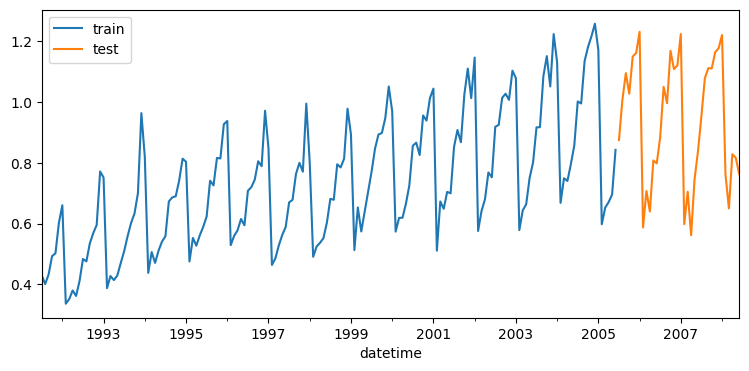

In [108]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [109]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 15
             )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-01-27 15:21:59 
Last fit date: 2023-01-27 15:21:59 
Skforecast version: 0.7.dev 
Python version: 3.9.13 

In [4]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

In [7]:
# Data download
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/' +
       'data/simulated_items_sales.csv')
data = pd.read_csv(url, sep=',')

# Data preparation
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()
data.head()

,item_1,item_2,item_3
date,,,
2012-01-01,8.253175,21.047727,19.429739
2012-01-02,22.777826,26.578125,28.009863
2012-01-03,27.549099,31.751042,32.078922
2012-01-04,25.895533,24.567708,27.252276
2012-01-05,21.379238,18.191667,20.357737


In [8]:
# Split data into train-val-test
# ==============================================================================
end_train = '2014-07-15 23:59:00'
data_train = data.loc[:end_train, :].copy()
data_test  = data.loc[end_train:, :].copy()

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2012-01-01 00:00:00 --- 2014-07-15 00:00:00  (n=927)
Test dates  : 2014-07-16 00:00:00 --- 2015-01-01 00:00:00  (n=170)


In [9]:
# Create and fit forecaster multi series
# ==============================================================================
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = Ridge(random_state=123),
                 lags               = 24,
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None
             )

forecaster.fit(series=data_train)
forecaster

ForecasterAutoregMultiSeries 
Regressor: Ridge(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for series: None 
Transformer for exog: None 
Window size: 24 
Series levels (names): ['item_1', 'item_2', 'item_3'] 
Series weights: None 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2014-07-15 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-02-22 14:38:27 
Last fit date: 2023-02-22 14:38:27 
Skforecast version: 0.7.0 
Python version: 3.9.13 

In [10]:
pd.DataFrame(forecaster._estimate_boot_interval(5, 'item_1'))

,0,1
0,23.220087,28.226068
1,22.141168,27.389805
2,21.688393,26.981395
3,20.508714,26.127966
4,20.394104,25.869121


In [14]:
forecaster.predict_bootstrapping(5)['item_1']

,pred_boot_0,pred_boot_1,pred_boot_2,pred_boot_3,pred_boot_4,pred_boot_5,pred_boot_6,pred_boot_7,pred_boot_8,pred_boot_9,...,pred_boot_490,pred_boot_491,pred_boot_492,pred_boot_493,pred_boot_494,pred_boot_495,pred_boot_496,pred_boot_497,pred_boot_498,pred_boot_499
2014-07-16,24.992098,27.474183,23.537907,25.615737,25.167445,26.045300,25.760568,23.312766,24.646091,25.560514,...,25.527527,26.098120,23.739748,25.565486,27.000823,24.971809,25.625696,26.759261,24.881654,30.491796
2014-07-17,25.354431,25.699547,24.806529,23.990339,25.109173,23.975097,24.587407,25.569599,24.406170,25.814938,...,25.000222,22.771645,24.546229,25.163796,25.371384,24.427723,25.478259,25.509826,22.598946,26.827838
2014-07-18,25.800695,25.808437,22.348476,24.578163,26.416754,22.041342,25.045697,23.121268,24.329671,22.791743,...,22.502835,22.789061,22.271161,24.405786,22.164870,24.450766,25.808065,24.234098,22.079980,24.227325
2014-07-19,24.355844,23.939162,24.645558,21.991444,23.209937,22.259762,23.688980,23.397382,24.259336,22.850552,...,22.750040,20.356592,21.616545,25.893548,25.377304,22.493699,24.299102,22.998632,20.465122,24.660813
2014-07-20,23.731017,27.445450,26.406054,24.513569,21.365381,23.258239,24.201595,20.904236,23.357744,21.858399,...,23.110692,21.494145,22.264347,28.367117,23.388272,23.247468,22.728072,21.303607,22.506775,21.720603


In [30]:
df.iloc[:, :500].quantile(q=interval, axis=1).transpose()

,0.05,0.95
2014-07-16,23.220087,28.226068
2014-07-17,22.141168,27.389805
2014-07-18,21.688393,26.981395
2014-07-19,20.508714,26.127966
2014-07-20,20.394104,25.869121


In [15]:
interval = np.array([5, 95])/100

In [18]:
forecaster.predict_interval_old(5)

,item_1,item_1_lower_bound,item_1_upper_bound,item_2,item_2_lower_bound,item_2_upper_bound,item_3,item_3_lower_bound,item_3_upper_bound
2014-07-16,25.497376,23.220087,28.226068,10.694506,7.093046,15.518896,11.275026,4.992239,18.080938
2014-07-17,24.866972,22.141168,27.389805,11.080091,6.467676,16.534679,11.313510,4.220834,18.599545
2014-07-18,24.281173,21.688393,26.981395,11.490882,7.077863,16.762530,13.030112,6.113241,20.462998
2014-07-19,23.515499,20.508714,26.127966,11.548922,7.119051,16.765540,13.378282,6.320599,21.519298
2014-07-20,23.206516,20.394104,25.869121,11.338041,6.557352,16.581976,12.511355,5.911201,20.006396


In [17]:
forecaster.predict_interval(5)

,item_1,item_1_lower_bound,item_1_upper_bound,item_2,item_2_lower_bound,item_2_upper_bound,item_3,item_3_lower_bound,item_3_upper_bound
2014-07-16,25.497376,23.220087,28.226068,10.694506,7.093046,15.518896,11.275026,4.992239,18.080938
2014-07-17,24.866972,22.141168,27.389805,11.080091,6.467676,16.534679,11.313510,4.220834,18.599545
2014-07-18,24.281173,21.688393,26.981395,11.490882,7.077863,16.762530,13.030112,6.113241,20.462998
2014-07-19,23.515499,20.508714,26.127966,11.548922,7.119051,16.765540,13.378282,6.320599,21.519298
2014-07-20,23.206516,20.394104,25.869121,11.338041,6.557352,16.581976,12.511355,5.911201,20.006396


In [21]:
from scipy.stats import norm

forecaster.predict_dist(5, norm)

,item_1_loc,item_1_scale,item_2_loc,item_2_scale,item_3_loc,item_3_scale
2014-07-16,25.544977,1.755377,10.753108,2.827206,11.440649,3.944114
2014-07-17,24.841986,1.737203,10.997333,3.197034,11.349466,4.574605
2014-07-18,24.178465,1.729232,11.259784,2.966631,13.104091,4.318020
2014-07-19,23.368456,1.659290,11.327420,2.991299,13.637604,4.531393
2014-07-20,23.102255,1.668402,11.234213,3.083831,12.586126,4.408607


In [5]:
import re
import pytest
from pytest import approx
import numpy as np
import pandas as pd
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from sklearn.linear_model import LinearRegression

In [6]:
from skforecast.ForecasterAutoregMultiSeries.tests.fixtures_ForecasterAutoregMultiSeries import series
from skforecast.ForecasterAutoregMultiSeries.tests.fixtures_ForecasterAutoregMultiSeries import exog
from skforecast.ForecasterAutoregMultiSeries.tests.fixtures_ForecasterAutoregMultiSeries import exog_predict

In [8]:
forecaster = ForecasterAutoregMultiSeries(LinearRegression(), lags=3)
forecaster.fit(series=series, exog=exog['col_1'])
forecaster.predict_bootstrapping(steps=2, n_boot=4, exog=exog_predict['col_1'], in_sample_residuals=True)

{'1':     pred_boot_0  pred_boot_1  pred_boot_2  pred_boot_3
 50     0.163866     0.563981     0.385762     0.377827
 51     0.049066     0.450193     0.074789     0.222437,
 '2':     pred_boot_0  pred_boot_1  pred_boot_2  pred_boot_3
 50     0.248987     0.698626     0.725728     0.456728
 51     0.293742     0.407581     0.745779     0.118839}

In [9]:
forecaster.predict_bootstrapping(steps=2, n_boot=4, exog=exog_predict['col_1'], in_sample_residuals=True)['1'].values

array([[0.16386591, 0.56398143, 0.38576231, 0.37782729],
       [0.04906615, 0.45019329, 0.07478854, 0.222437  ]])

In [12]:
forecaster.in_sample_residuals

{'1': array([ 2.13276058e-04,  1.52089501e-01, -9.28748014e-02,  5.44569957e-01,
         1.66570448e-01,  2.19514368e-02, -1.03243821e-01, -1.82900891e-01,
         1.97338821e-01, -1.59954375e-01, -3.96108237e-01, -9.91956356e-02,
         2.33747356e-01, -3.64086156e-01, -3.17205195e-01, -3.81604445e-02,
         8.29103220e-02,  1.72604733e-01,  2.76040501e-01,  1.53852848e-01,
         1.00973677e-01,  3.06413806e-01, -9.53088001e-02, -1.74128951e-01,
        -2.47938416e-01, -1.57283144e-01,  9.97415522e-02, -4.07251177e-01,
        -1.29495190e-01, -5.21135618e-02,  2.40376352e-02, -5.83904802e-04,
        -2.79342129e-01, -8.81454895e-02,  3.23252471e-01,  3.82259381e-01,
        -3.24131838e-02,  6.83211256e-02, -4.10069097e-01, -8.79956701e-02,
        -6.67645734e-02,  3.21582252e-01, -2.52445998e-01,  2.97602092e-02,
         4.14381013e-01, -3.99750537e-03,  1.66394024e-01]),
 '2': array([-0.0617857 , -0.17420553, -0.15274751, -0.00867655,  0.17772629,
         0.40933191,

In [11]:
forecaster.predict_bootstrapping(steps=2, n_boot=4, exog=exog_predict['col_1'], in_sample_residuals=True)['2'].values

array([[0.24898667, 0.69862572, 0.72572763, 0.45672811],
       [0.29374176, 0.40758093, 0.74577937, 0.11883889]])

In [27]:
from scipy.stats import norm

forecaster = ForecasterAutoregMultiSeries(
                    regressor          = LinearRegression(),
                    lags               = 3,
                    transformer_series = StandardScaler(),
                    transformer_exog   = transformer_exog,
                )

forecaster.fit(series=series, exog=exog)
results = forecaster.predict_dist(
                steps               = 2,
                distribution        = norm,
                levels              = ['1', '2'],
                exog                = exog_predict,
                n_boot              = 4,
                in_sample_residuals = True
            )

In [30]:
results

,1_loc,1_scale,2_loc,2_scale
50,0.381727,0.139323,0.544044,0.208409
51,0.225549,0.168192,0.421332,0.215195


In [20]:
forecaster.predict_bootstrapping(steps=2, exog=exog_predict, n_boot=4, in_sample_residuals=True)['1'].values

array([[0.16958001, 0.55887507, 0.41716867, 0.38128471],
       [0.08114962, 0.48871107, 0.07673561, 0.25559782]])

In [33]:
import re
import pytest
import numpy as np
import pandas as pd
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler




forecaster = ForecasterAutoregDirect(LinearRegression(), lags=3, steps=2)
forecaster.fit(y=pd.Series(np.arange(10)))

forecaster.out_sample_residuals

{1: None, 2: None}

In [35]:
if all(value is None for value in forecaster.out_sample_residuals.values()):
    print(1)

1


In [36]:
exog = pd.DataFrame(np.arange(10).reshape(5, 2), columns=['col1', 'col3'])
exog.index=pd.date_range(start='1/6/2018', periods=5, freq='M')
exog

,col1,col3
2018-01-31,0,1
2018-02-28,2,3
2018-03-31,4,5
2018-04-30,6,7
2018-05-31,8,9


In [41]:
pd.date_range(start='6/1/2018', periods=5, freq='M')


DatetimeIndex(['2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31'],
              dtype='datetime64[ns]', freq='M')